In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA and Statistical Analysis of Credit Card Dataset

## Part-A

The following are the ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO
57 61 57 57 58 57 61 54 68
51 49 64 50 48 65 52 56 46
54 49 50 47 55 55 54 42 51
56 55 54 51 60 62 43 55 56
61 52 69 64 46 54
Use this data for answering following questions where relevant.

In [151]:
df=pd.DataFrame({'Age':[57,61,57,57,58,57,61,54,68,51,49,64,50,48,65,52,56,46,54,49,50,47,55,55,54,42,51,56,55,54,51,60,62,43,55,56,61,52,69,64,46,54]})
df

,Age
0,57
1,61
2,57
3,57
4,58
5,57
6,61
7,54
8,68
9,51


 **Q1. Compute the mean, median and the mode of the data**

In [152]:
df.mean()

Age    54.904762
dtype: float64

In [153]:
df.median()

Age    55.0
dtype: float64

In [154]:
df.mode()

,Age
0,54


**Q2. Compute the range , variance and standard deviation of CEO ages**


In [155]:
range_ceo=df.max()-df.min()
range_ceo

Age    27
dtype: int64

In [156]:
df.var()

Age    39.454123
dtype: float64

In [157]:
df.std()

Age    6.281252
dtype: float64

**Q3. Find the mean deviation for the data . The mean deviation is defined as below.**


In [158]:
# mean deviation= absolute sum of x-xbar/n
x=0
for i in df.Age:
    j=i-df['Age'].mean()
    x+=abs(j)
mean_deviation=x/len(df.Age)
mean_deviation

4.814058956916099

**Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of 
the data
[A measure to determine the skewness of a distribution is called the Pearson
coefficient of skewness. The formula is skewness= 3*(mean-median)/standard deviation
The value of the coefficient if skewness usually ranges from –3 to 3. When the
distribution is symmetric, the coefficient is zero; when the distribution is positively 
skewed , the coefficient is positive, and when the distribution is negatively skewed 
the coefficient is negative.]**


In [159]:
ppskew=(3*(df['Age'].mean()-df['Age'].median()))/df['Age'].std()
ppskew

-0.04548683903435661

Though the Pearson coefficient of skewness is negative (-0.0454), the distribution here is considered as symmetric, as the value is closer to 0

**Q5. Count the number of data values that fall within two standard deviations of the
mean. Compare this with the answer from Chebyshev’s Theorem.**

In [160]:
df['Age'].std()

6.2812517154353635

In [161]:
df['Age'].mean()

54.904761904761905

In [162]:
lower_limit=df['Age'].mean()-(2*df['Age'].std())
upper_limit=df['Age'].mean()+(2*df['Age'].std())
lower_limit,upper_limit

(42.34225847389118, 67.46726533563263)

In [163]:
df[(df['Age']>=lower_limit)&(df['Age']<=upper_limit)]

,Age
0,57
1,61
2,57
3,57
4,58
5,57
6,61
7,54
9,51
10,49


In [164]:
df[(df['Age']>=lower_limit)&(df['Age']<=upper_limit)].shape[0]

39

In [165]:
# Checking using Chebyshev's Theorem
k=(upper_limit-lower_limit)/df['Age'].std()
k

4.0

In [166]:
1-(1/(k**2))

0.9375

In [167]:
round(0.9375*df.shape[0]) 
# The calculated number of data between 2 standard deviations of mean is equal to the prediction by Chebyshev's Theorem.
# According to Chebyshev's theorem, a minimum of 3/4 of the data lie within 2 standard deviations of the mean.

39

**Q6. Find the three quartiles and the interquartile range (IQR).**

In [168]:
q1=df['Age'].quantile(0.25)
q2=df['Age'].quantile(0.5)
q3=df['Age'].quantile(0.75)
IQR=q3-q1
print('1st quartile:',q1,'\n2nd quartile:',q2,'\n3rd quartile:',q3,'\nIQR:',IQR)

1st quartile: 51.0 
2nd quartile: 55.0 
3rd quartile: 57.75 
IQR: 6.75


**Q7. Are there any outliers in the data set ?**

In [169]:
ll=q1-(1.5*IQR)
ul=q3+(1.5*IQR)
df[(df['Age']<ll)|(df['Age']>ul)] # Yes, there are outliers

,Age
8,68
38,69


**Q8.Draw a boxplot of the dataset to confirm.**

<AxesSubplot:xlabel='Age'>

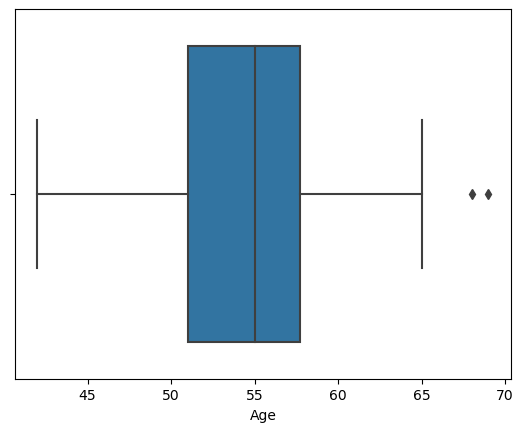

In [170]:
sns.boxplot(df['Age']) # shows 2 outliers

**Q9. Find the percentile rank of the datapoint 50.**

In [171]:
df['Pct_rnk']=df['Age'].rank(pct=True)
df

,Age,Pct_rnk
0,57,0.702381
1,61,0.833333
2,57,0.702381
3,57,0.702381
4,58,0.761905
5,57,0.702381
6,61,0.833333
7,54,0.428571
8,68,0.976190
9,51,0.285714


In [172]:
df.loc[df['Age']==50,'Pct_rnk']

12    0.22619
20    0.22619
Name: Pct_rnk, dtype: float64

**Q10. What is the probability that a person becoming a CEO is below 50 years of age ?**


In [173]:
n=df.shape[0]
below_50=df[df['Age']<50].shape[0]
p=below_50/n
p

0.19047619047619047

**Q11. Create a frequency distribution for the data and visualize it appropriately**

<AxesSubplot:xlabel='count', ylabel='Age'>

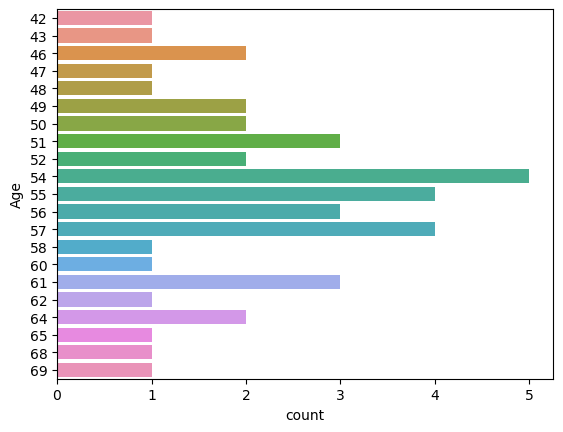

In [174]:
sns.countplot(y=df['Age']) # Frequency of age 54 is highest

**Q12. Create a probability distribution of the data and visualize it appropriately.**

<AxesSubplot:xlabel='Age', ylabel='Density'>

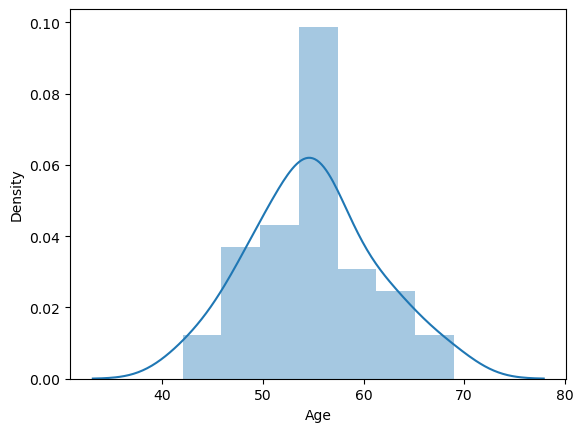

In [175]:
sns.distplot(df['Age'])

**Q13. What 
is the shape of the distribution of this dataset? Create an appropriate graph to 
determine that. Take 100 random samples with replacement from this dataset of 
size 5 each. Create a sampling distribution ofthe mean age of customers. Compare 
with other sampling distributions of sample size 10, 15, 20, 25, 30. State your 
observations. Does it corroborate the Central Limit Theorem?**

In [176]:
import random
random.choices(df['Age'],k=5)

[55, 65, 51, 50, 47]

In [177]:
sample_mean5=[]
for i in range(1,101):
    sample=random.choices(df['Age'],k=5)
    sample_mean5.append(np.mean(sample))
print(sample_mean5)

[59.8, 57.4, 55.4, 51.6, 59.2, 60.0, 55.2, 54.2, 56.6, 53.4, 53.6, 54.4, 52.0, 53.0, 53.2, 52.8, 51.4, 55.0, 52.0, 56.4, 54.8, 60.8, 55.8, 57.4, 58.4, 53.6, 57.0, 57.2, 55.4, 53.2, 58.4, 51.4, 55.0, 51.6, 56.4, 56.2, 52.6, 54.2, 58.8, 51.2, 53.8, 57.0, 52.6, 56.6, 51.0, 56.0, 54.0, 57.2, 56.0, 55.8, 57.6, 54.4, 51.6, 55.8, 58.6, 57.2, 57.6, 57.6, 57.0, 55.2, 52.2, 56.8, 53.2, 56.8, 52.4, 55.0, 59.0, 55.6, 55.6, 52.6, 57.4, 53.0, 58.4, 58.8, 54.6, 56.0, 54.6, 52.8, 54.8, 60.6, 51.0, 53.0, 51.4, 53.0, 55.8, 55.2, 57.4, 53.0, 56.0, 55.8, 53.8, 50.2, 54.4, 53.4, 54.6, 54.8, 54.2, 55.4, 50.6, 51.8]


<AxesSubplot:ylabel='Density'>

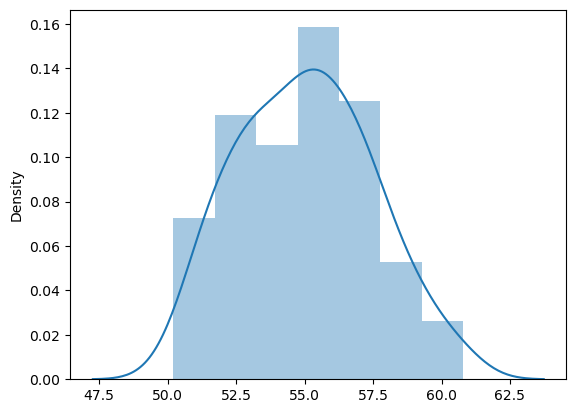

In [178]:
sns.distplot(sample_mean5)

In [179]:
np.mean(sample_mean5), df['Age'].mean()

(55.036, 54.904761904761905)

In [180]:
pd.Series(sample_mean5).skew() # skewness of sampling distribution sample sizes of 5

0.17330376460912258

In [181]:

sample_mean10=[]
for i in range(1,101):
    sample=random.choices(df['Age'],k=10)
    sample_mean10.append(np.mean(sample))
print(sample_mean10)


[58.2, 58.0, 53.3, 55.0, 52.8, 51.2, 51.9, 57.8, 52.8, 59.3, 56.9, 54.3, 61.9, 54.3, 55.8, 55.6, 53.2, 57.5, 53.3, 54.7, 56.1, 57.3, 53.8, 56.4, 52.7, 56.5, 52.7, 55.2, 56.7, 55.9, 55.4, 56.1, 55.1, 57.6, 53.6, 58.1, 52.5, 56.9, 52.5, 56.1, 51.8, 54.0, 50.3, 51.1, 57.5, 57.0, 53.4, 56.3, 55.6, 58.7, 52.5, 56.1, 54.1, 56.0, 54.3, 50.6, 56.6, 58.7, 53.0, 52.0, 52.9, 52.9, 56.5, 53.1, 52.9, 57.5, 52.4, 51.0, 56.7, 56.4, 54.6, 57.2, 52.4, 53.5, 55.2, 53.5, 55.3, 53.8, 53.5, 54.7, 54.7, 55.6, 53.9, 56.8, 54.7, 56.1, 56.9, 55.1, 55.5, 52.8, 53.9, 57.8, 53.2, 56.2, 53.6, 54.8, 51.0, 56.1, 53.7, 59.0]


In [182]:
np.mean(sample_mean10), df['Age'].mean()

(54.92000000000001, 54.904761904761905)

In [183]:
pd.Series(sample_mean10).skew() # skewness of sampling distribution sample sizes of 10

0.2205539457603075

In [184]:
sample_mean15=[]
for i in range(1,101):
    sample=random.choices(df['Age'],k=15)
    sample_mean15.append(np.mean(sample))
print(sample_mean15)

[54.46666666666667, 54.666666666666664, 55.53333333333333, 52.2, 56.4, 53.93333333333333, 52.8, 55.0, 54.6, 58.0, 51.93333333333333, 55.0, 52.8, 54.2, 54.46666666666667, 54.53333333333333, 55.333333333333336, 52.93333333333333, 56.2, 52.8, 53.333333333333336, 58.266666666666666, 54.666666666666664, 56.93333333333333, 52.06666666666667, 53.53333333333333, 57.2, 54.666666666666664, 53.266666666666666, 53.266666666666666, 54.46666666666667, 53.4, 55.06666666666667, 53.86666666666667, 56.06666666666667, 53.666666666666664, 54.06666666666667, 54.8, 56.0, 53.333333333333336, 52.86666666666667, 55.2, 55.86666666666667, 53.266666666666666, 53.0, 55.46666666666667, 55.13333333333333, 54.6, 54.86666666666667, 51.4, 52.86666666666667, 57.2, 54.53333333333333, 55.266666666666666, 55.8, 54.86666666666667, 53.6, 54.53333333333333, 53.93333333333333, 52.06666666666667, 53.666666666666664, 56.46666666666667, 55.733333333333334, 57.46666666666667, 52.53333333333333, 56.2, 53.13333333333333, 57.26666666

In [185]:
np.mean(sample_mean15), df['Age'].mean()

(54.59799999999999, 54.904761904761905)

In [186]:
pd.Series(sample_mean15).skew() # skewness of sampling distribution sample sizes of 15

0.2913065273638819

In [187]:
sample_mean20=[]
for i in range(1,101):
    sample=random.choices(df['Age'],k=20)
    sample_mean20.append(np.mean(sample))
print(sample_mean20)

[57.5, 55.85, 55.4, 53.8, 56.6, 53.8, 54.85, 54.65, 53.7, 55.2, 55.0, 54.35, 52.5, 54.2, 56.4, 53.95, 53.8, 54.0, 54.35, 55.85, 53.85, 53.9, 55.0, 55.95, 56.1, 54.0, 56.5, 55.7, 57.0, 55.95, 52.3, 56.3, 55.9, 52.6, 52.65, 56.1, 53.2, 55.0, 54.8, 55.65, 57.4, 54.6, 56.4, 54.95, 54.5, 55.3, 55.15, 55.65, 57.55, 55.3, 52.3, 52.55, 55.4, 53.35, 55.25, 56.6, 56.05, 55.05, 53.6, 54.65, 54.05, 54.75, 55.9, 54.95, 57.35, 53.3, 54.55, 58.65, 52.35, 54.85, 55.3, 55.1, 56.85, 54.7, 52.8, 53.1, 55.15, 56.55, 55.6, 53.75, 54.1, 55.45, 54.7, 56.55, 52.0, 55.3, 56.55, 54.75, 54.75, 55.7, 53.75, 54.65, 53.55, 54.45, 52.6, 51.7, 53.9, 55.05, 55.25, 53.55]


In [188]:
np.mean(sample_mean20), df['Age'].mean()

(54.836999999999996, 54.904761904761905)

In [189]:
pd.Series(sample_mean20).skew() # skewness of sampling distribution sample sizes of 20

-0.00018818564927786043

In [190]:
sample_mean25=[]
for i in range(1,101):
    sample=random.choices(df['Age'],k=25)
    sample_mean25.append(np.mean(sample))
print(sample_mean25)

[54.12, 54.88, 54.16, 56.76, 56.0, 55.16, 54.08, 54.56, 56.12, 54.2, 56.0, 54.16, 54.96, 54.88, 52.28, 56.76, 55.64, 54.32, 54.76, 53.28, 56.12, 54.08, 54.44, 56.36, 55.0, 54.12, 55.92, 55.52, 53.04, 55.68, 55.2, 58.56, 55.04, 55.96, 53.96, 55.04, 53.96, 53.2, 54.76, 56.48, 55.72, 55.6, 55.16, 54.0, 54.72, 54.36, 57.08, 56.52, 54.24, 55.56, 56.2, 56.68, 54.56, 56.68, 57.12, 55.88, 54.8, 56.24, 55.96, 55.8, 56.12, 54.2, 53.28, 54.76, 52.28, 54.56, 53.28, 56.64, 55.36, 53.84, 54.88, 55.4, 55.36, 57.44, 54.76, 53.08, 54.32, 54.72, 55.12, 55.84, 55.2, 54.88, 55.24, 52.0, 55.76, 53.76, 54.84, 52.84, 54.44, 57.08, 56.48, 53.76, 53.68, 54.52, 57.08, 54.76, 53.4, 56.12, 56.2, 54.16]


In [191]:
np.mean(sample_mean25), df['Age'].mean()

(55.038399999999996, 54.904761904761905)

In [192]:
pd.Series(sample_mean25).skew() # skewness of sampling distribution sample sizes of 25

-0.0013898663562379988

In [193]:
sample_mean30=[]
for i in range(1,101):
    sample=random.choices(df['Age'],k=30)
    sample_mean30.append(np.mean(sample))
print(sample_mean30)

[55.233333333333334, 55.1, 53.833333333333336, 52.6, 54.833333333333336, 55.8, 55.9, 53.3, 56.1, 55.93333333333333, 55.6, 53.63333333333333, 53.43333333333333, 56.06666666666667, 54.166666666666664, 54.8, 53.8, 55.266666666666666, 55.333333333333336, 54.333333333333336, 53.9, 56.53333333333333, 55.833333333333336, 55.63333333333333, 52.63333333333333, 55.53333333333333, 54.96666666666667, 54.733333333333334, 54.733333333333334, 51.6, 55.166666666666664, 54.43333333333333, 55.9, 54.53333333333333, 54.4, 52.766666666666666, 53.9, 56.46666666666667, 55.3, 56.1, 53.666666666666664, 53.5, 56.43333333333333, 54.63333333333333, 56.7, 56.4, 53.63333333333333, 56.86666666666667, 54.53333333333333, 55.666666666666664, 55.13333333333333, 55.56666666666667, 53.36666666666667, 53.733333333333334, 54.1, 55.0, 55.266666666666666, 56.266666666666666, 55.8, 56.03333333333333, 55.43333333333333, 53.6, 55.46666666666667, 55.9, 55.93333333333333, 54.9, 54.333333333333336, 53.86666666666667, 56.4, 57.7, 53

In [194]:
np.mean(sample_mean30), df['Age'].mean()

(54.852999999999994, 54.904761904761905)

In [195]:
pd.Series(sample_mean30).skew() # skewness of sampling distribution sample sizes of 30

-0.18229883015356194

In [196]:
df1=pd.DataFrame({'sample_mean_5':sample_mean5,'sample_mean_10':sample_mean10,'sample_mean_15':sample_mean15,'sample_mean_20':sample_mean20,'sample_mean_25':sample_mean25,'sample_mean_30':sample_mean30})
df1.head()

,sample_mean_5,sample_mean_10,sample_mean_15,sample_mean_20,sample_mean_25,sample_mean_30
0,59.8,58.2,54.466667,57.50,54.12,55.233333
1,57.4,58.0,54.666667,55.85,54.88,55.100000
2,55.4,53.3,55.533333,55.40,54.16,53.833333
3,51.6,55.0,52.200000,53.80,56.76,52.600000
4,59.2,52.8,56.400000,56.60,56.00,54.833333


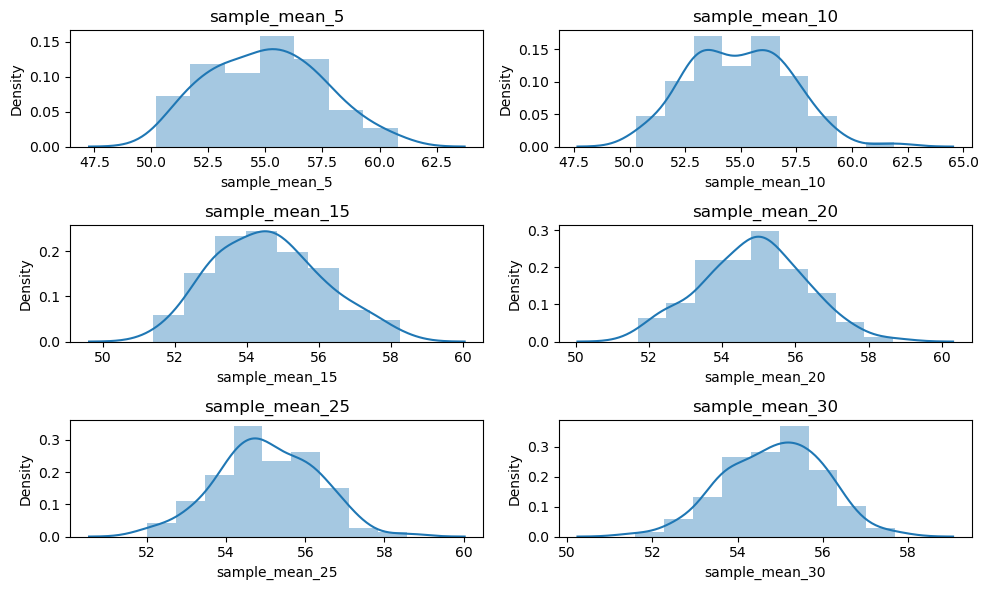

In [197]:
num_vars=list(df1.columns)
nrows=3
ncols=2
repeater=1
plt.figure(figsize=(10,6))
for i in num_vars:
    plt.subplot(nrows,ncols,repeater)
    sns.distplot(df1.loc[:,i])
    plt.title(i)
    repeater=repeater+1
plt.tight_layout()    
plt.show()

In [198]:
s=pd.DataFrame({'size 5':sample_mean5, 'size 10':sample_mean10, 'size 15':sample_mean15, 'size 20':sample_mean20, 'size 25': sample_mean25, 'size 30': sample_mean30})
s.skew()

size 5     0.173304
size 10    0.220554
size 15    0.291307
size 20   -0.000188
size 25   -0.001390
size 30   -0.182299
dtype: float64

Central limit theorem states that states that regardless of the population's distribution, the distribution of sample means approximates a normal distribution. The sample distributions of different sample sizes follows the central limit theorem.

**Q14. Treat this dataset as a binomial distribution where p is the probability that a 
person becomes a CEO above 50 years age. What is the probability that out of a 
random sample of 10 CEOs of Fortune 500 companies exactly 6 are above 50 years 
of age?**

In [199]:
from scipy import stats
p=df[df['Age']>50].shape[0]/df.shape[0]
n=10
r=6
stats.binom.pmf(r,n,p)

0.13201590604140495

**Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 
60 years of age. Using the Normal approximation of a Binomial distribution, find the 
probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs
will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]**

In [200]:
n=300
r=75
p=0.25
stats.binom.pmf(r,n,p)

0.0531283151571921

**Q16. Compute a 95% Confidence Interval for the true mean age of the population of 
CEOs for the given dataset using appropriate distribution.( State reasons as to why 
did you use a z or t distribution)**

In [201]:
n=df.shape[0]
s=df.Age.std()
stats.t.interval(0.95,loc=df['Age'].mean(),scale=s/np.sqrt(n),df=n-1)

(52.94738608388915, 56.86213772563466)

**Q17. A data scientist wants to estimate with 95% confidence the proportion of CEOs 
of Fortune 500 companies are above 60 years in the population.
Another recent study showed that 25% of CEOs interviewed were above 60. The 
data scientist wants to be accurate within 2% of the true proportion. Find the
minimum sample size necessary.**


In [202]:
z=stats.norm.isf(0.025)
p=0.25
marginal_error=0.02
n=((z**2)*(p*(1-p)))/(marginal_error**2)
round(n)

1801

**Q18. The same data scientist wants to estimate the true proportion of CEOs
ascending to the post and above 60 years. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size
necessary.**

In [203]:
p=(df[df['Age']>60].shape[0]/df['Age'].shape[0])
z=stats.norm.isf(0.1/2)
marginal_error=0.05
n=((z**2)*(p*(1-p)))/(marginal_error**2)
round(n)

182

**Q19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his 
claim with an alpha =0.05 if out of a random sample of 30 CEOs only 10 are above 60 
years.**

In [204]:
# h0= 25 % of all ceo are lessthan or equal to 60 years
# h1= 25% of all CEOS are above 60 years 

In [205]:
p=0.25
p0=10/30
n=30
teststat=(p-p0)/np.sqrt((p0*(1-p0))/n)
stats.norm.sf(teststat), teststat, stats.norm.isf(0.025)

(0.8335391959672169, -0.968245836551854, 1.9599639845400545)

In [206]:
# zstats is in acceptance region ,so null hypothesis failed to reject, pvalue > 0.05
# that means 25 % of all ceo are less than or equal to 60 years

**Q20. Assume you are a data scientist for the Fortune 500 companies. You are asked 
to research the question whether the CEO ages of UK are on average older than the
CEO ages of Americans. you take a random sample of 40 CEO ages from America 
and UK and the data is as follows:**
* UK

47 49 73 50 65 70 49 47 40 43
46 35 38 40 47 39 49 37 37 36
40 37 31 48 48 45 52 38 38 36
44 40 48 45 45 36 39 44 52 47

*  USA

47 57 52 47 48 56 56 52 50 40
46 43 44 51 36 42 49 49 40 43
39 39 22 41 45 46 39 32 36 32
32 32 37 33 44 49 44 44 49 32

a. What are your hypotheses?

b. What significance level will you use?

c. What statistical test will you use?

d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)

e. What is your decision?

f. What can you conclude?

g. Do you feel that using the data given really answers the original
question asked?

h. What other data might be used to answer the question?


In [207]:
uk=[47, 49, 73, 50, 65, 70, 49, 47, 40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48, 45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44, 52, 47]
usa=[47, 57, 52, 47, 48, 56, 56, 52, 50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41, 45, 46, 39, 32, 36, 32, 32, 32, 37, 33, 44, 49, 44, 44, 49, 32]


In [208]:
xbar1=sum(uk)/len(uk)
xbar2=sum(usa)/len(usa)
n1=len(uk)
n2=len(usa)

a. What are your hypotheses?
* H0: average age of CEOs in UK is lesser than or equal to average age of CEOs in USA (mu1-mu2<=0)
* H1: average age of CEOs in UK is greater than average age of CEOs in USA (mu1-mu2>0)

b. What significance level will you use?

By default 95% confidence level is used, wherein the significance level is 5%

c. What statistical test will you use?

Before proceeding with two sample tests, we should check for data normality (Shapiro-Wilk test) and we should also check for the equal variance (Levene's test). Parametric tests will be used if the given data are both normal and have equal variance. Else non-parametric tests will be used.Two sample t test (right-tail) will be performed as the given information is about samples and no population parameters were given, if both the data are normal. Data is not normal for UK and data is normal for USA. MannWhitneyU test is the suitable test for this case.

In [209]:
stats.shapiro(uk),stats.shapiro(usa),stats.levene(uk,usa) 

(ShapiroResult(statistic=0.8574686050415039, pvalue=0.00013729145575780421),
 ShapiroResult(statistic=0.9727827310562134, pvalue=0.43887171149253845),
 LeveneResult(statistic=0.020083022437076308, pvalue=0.8876708478111702))

In [210]:
#d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)
stats.mannwhitneyu(uk,usa,alternative='greater') # Non-parametric test
# pvalue>significance level (0.05). Failing to reject null hypothesis
# The average age of CEOs in UK is lesser than or equal to average age of CEOs in USA

MannwhitneyuResult(statistic=837.0, pvalue=0.3624983266618426)

In [211]:
# if we assume the data to be normal and have to use the sample standard deviations that are provided, we will perform ttest here
s1=8.8
s2=7.8
sp=np.sqrt((((n1-1)*((s1)**2))+((n2-1)*((s2)**2)))/(n1+n2-2))
num=xbar1-xbar2
deno=sp*(np.sqrt((1/n1)+(1/n2)))
t=num/deno
print('Test statistic:',t,'\npvalue:',stats.t.sf(t,df=n1+n2-2))
print('Testing results with ttest_ind built-in function:',stats.ttest_ind(uk,usa,alternative='greater'))
# pvalue > significance level. Failing to reject H0. 
# The average age of CEOs in UK is lesser than or equal to average age of CEOs in USA

Test statistic: 1.0084435261263633 
pvalue: 0.15817987687093638
Testing results with ttest_ind built-in function: Ttest_indResult(statistic=1.0018742016808726, pvalue=0.15975117819260404)


e. What is your decision?

MannWhitneyU test: pvalue > significance level (0.35>0.05)

Ttest: pvalue > significance level (0.15>0.05)

f. What can you conclude?

MannWhitneyU test: Failing to reject null hypothesis. The average age of CEOs in UK is lesser than or equal to average age of CEOs in USA.

Ttest: Failing to reject null hypothesis. The average age of CEOs in UK is lesser than or equal to average age of CEOs in USA.   

g. Do you feel that using the data given really answers the original question asked?

The UK data appeared not in normal distribution. More number of samples are required to determine the aim of the research study to make conclusions about the population. 

h. What other data might be used to answer the question?

More number of samples of CEO ages and their fields might be useful in data consistency and normality and also to perform 2 sample tests or ANOVA test.

## Part-B

**1. Import the dataset and view the first 10 rows of it.**

In [212]:
cc=pd.read_csv('creditcard.csv')
cc.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**2. Display shape/dimension of the dataset.**

In [213]:
cc.shape

(284807, 31)

In [214]:
cc.size

8829017

**3. Check for the missing values.Display number of missing values per column.**

In [215]:
cc.isnull().sum() # no null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**4. Check the datatype, number of non-null values and name of each variablein the
dataset.**

In [216]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**5. Check if there are any non-real characters in the dataset.**

There are no non-real characters within the data in the dataset. If a non-real character is present in a column, the resulting dtype of the column will be shown as object instead of int and float.

In [217]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**6. Check the descriptive statistics of the dataset.**

In [218]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**7. Check the number of fraudulent transactions in the dataset and visualize using 
pie chart and
bar plot.**

In [219]:
cc[cc['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [220]:
fraud=cc[cc['Class']==1]
fraud.shape[0] # No. of Fraudulent transactions

492

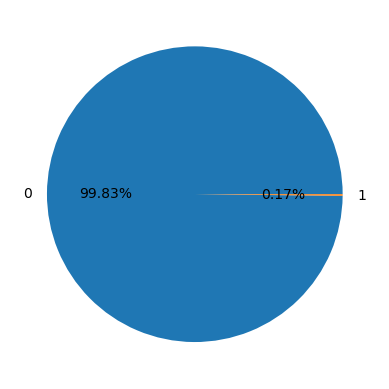

In [221]:
plt.pie(cc['Class'].value_counts(),labels=cc['Class'].unique(),autopct='%.2f%%')
plt.show() # Class 0 is 99.83% whereas Class 1 is 0.17%

<AxesSubplot:xlabel='Class', ylabel='count'>

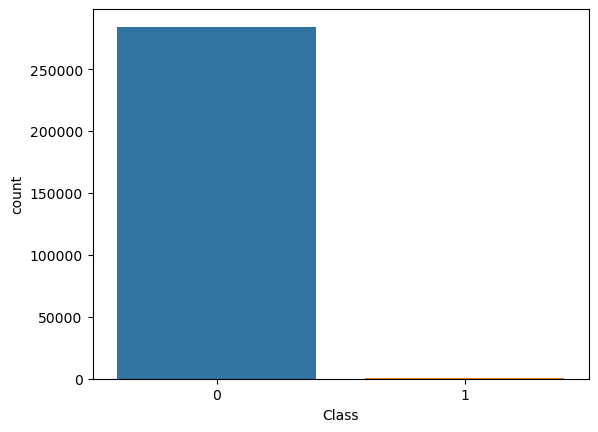

In [222]:
sns.countplot(cc['Class']) # Non-fraudulent transactions are higher than fraudulent transactions

**8. Check the maximum and minimum fraudulent amount.**

In [223]:
fraud['Amount'].min()

0.0

In [224]:
fraud['Amount'].max()

2125.87

**9. Check the number of transactions where the transaction amount is zero and 
consider as a fraud transaction.**


In [225]:
fraud[fraud['Amount']==0].shape[0]

27

**10. Check the distribution of columns. List down columns that are normally
distributed. List down columns that are not normally distributed.**

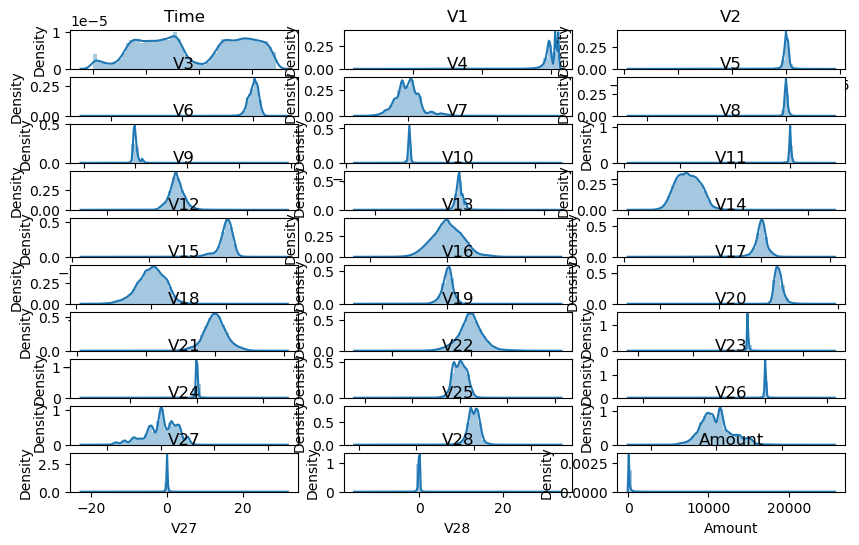

In [226]:
nrows=10
ncols=3
repeater=1
plt.figure(figsize=(10,6))
for i in ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']:
    plt.subplot(nrows,ncols,repeater)
    sns.distplot(cc[i])
    plt.title(i)
    repeater=repeater+1
    
plt.tight_layout()
plt.show()

In [227]:
woc=cc.drop('Class',axis=1)
woc.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
dtype: float64

Only 'Time' and 'V13' appears close to normal distribution based on the skewness. Other columns are skewed and not normally distributed 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'

**11. List down columns that are highly skewed.**


In [228]:
woc.skew().sort_values(ascending=False)


Amount    16.977724
V28       11.192091
V21        3.592991
V7         2.553907
V6         1.826581
V10        1.187141
V4         0.676292
V26        0.576693
V9         0.554680
V11        0.356506
V19        0.109192
V13        0.065233
Time      -0.035568
V22       -0.213258
V18       -0.259880
V15       -0.308423
V25       -0.415793
V24       -0.552499
V16       -1.100966
V27       -1.170209
V14       -1.995176
V20       -2.037155
V3        -2.240155
V12       -2.278401
V5        -2.425901
V1        -3.280667
V17       -3.844914
V2        -4.624866
V23       -5.875140
V8        -8.521944
dtype: float64

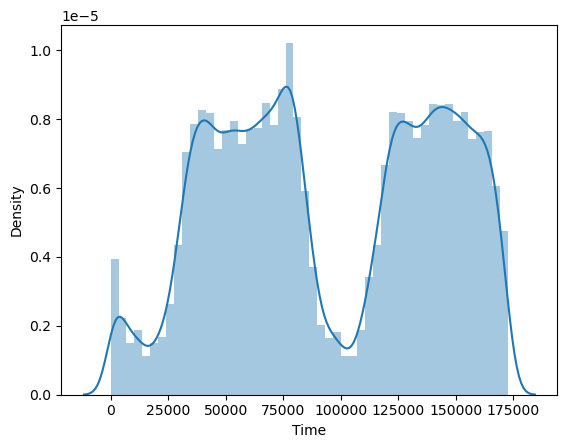

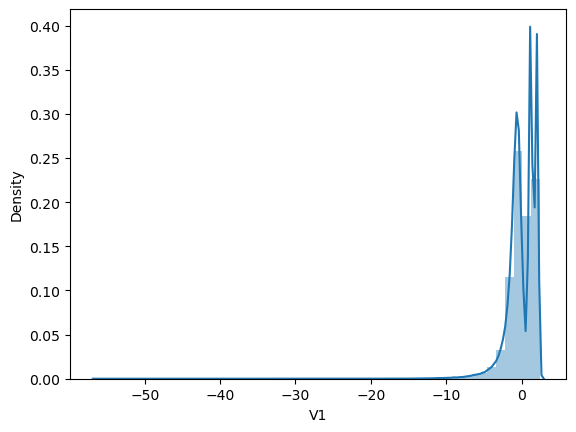

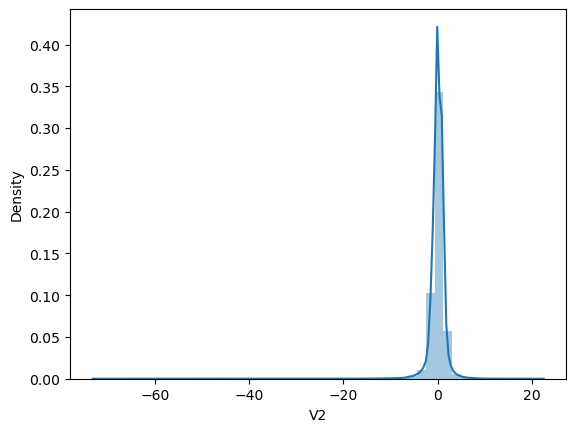

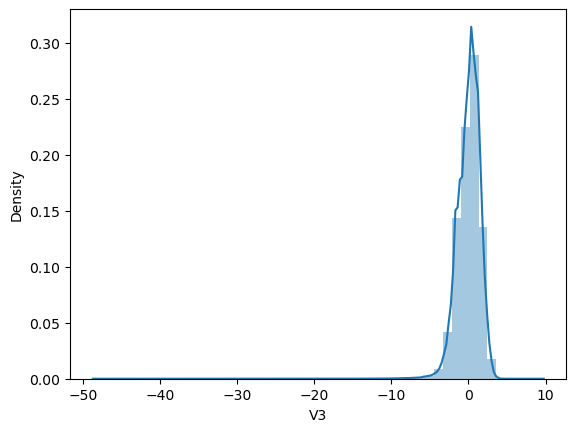

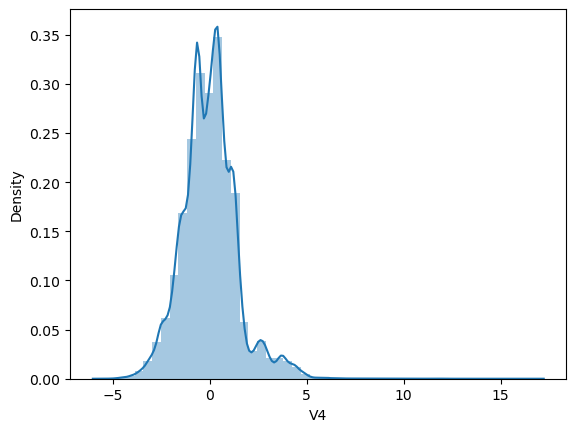

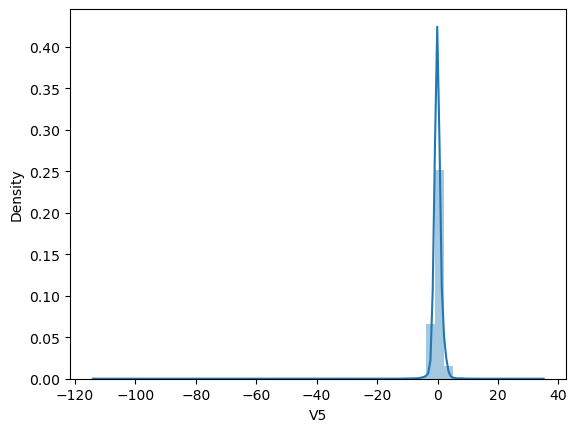

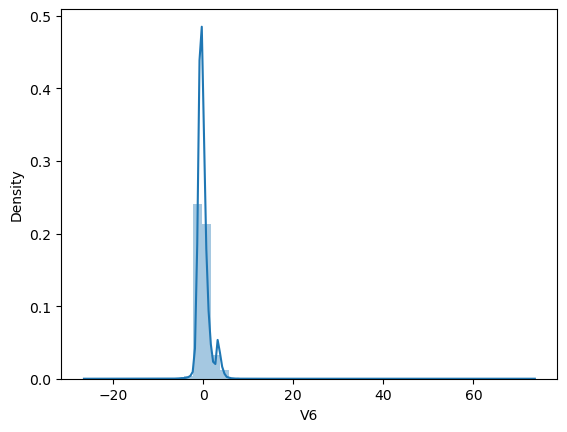

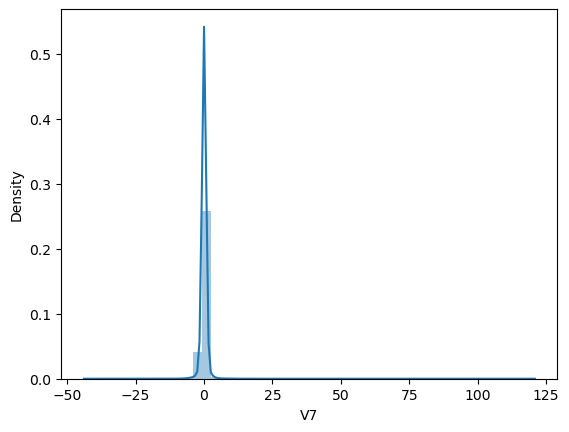

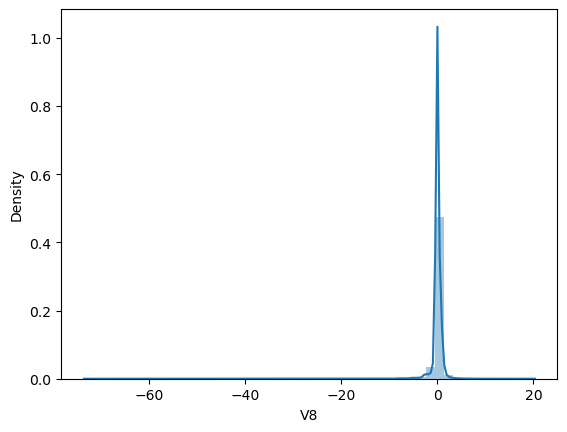

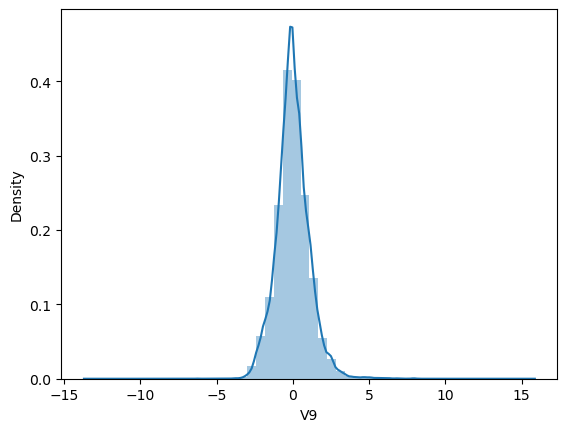

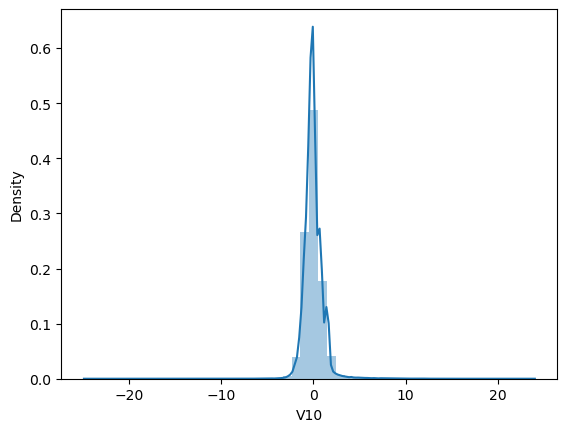

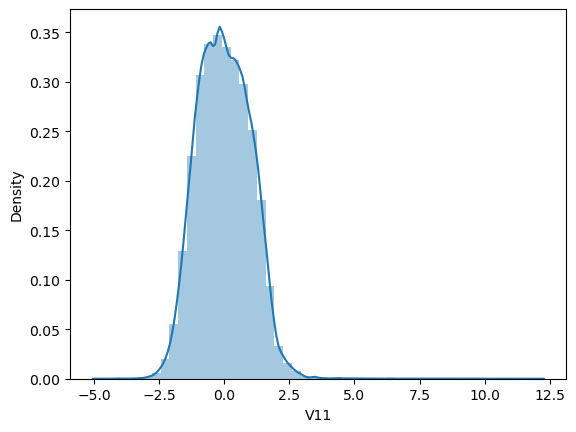

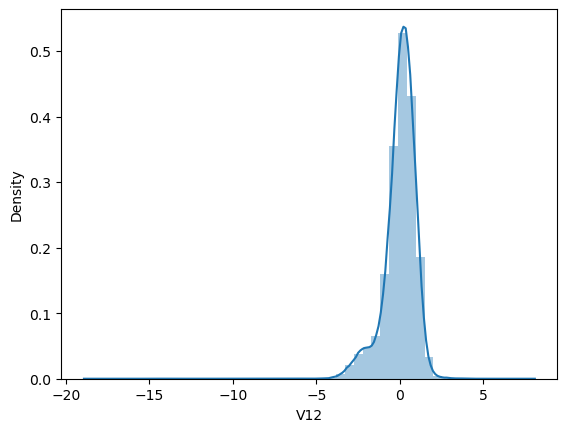

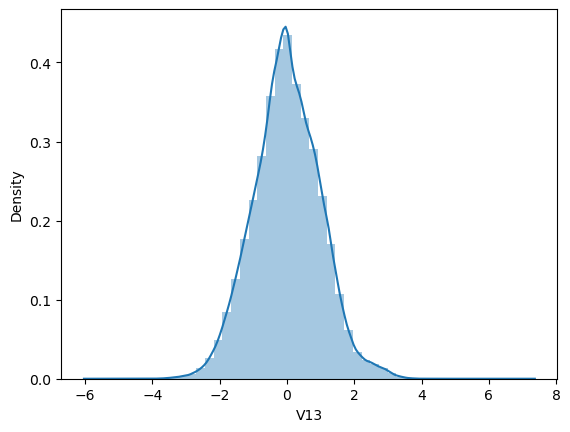

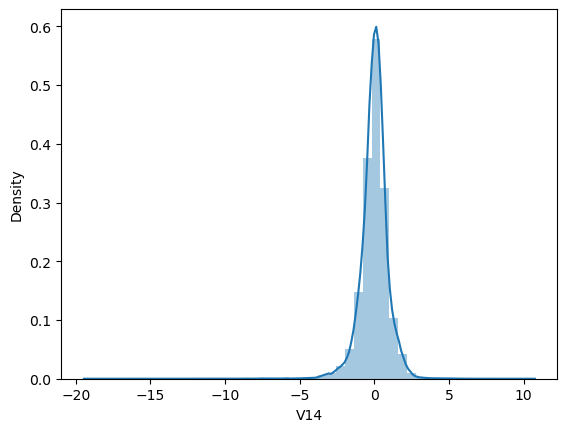

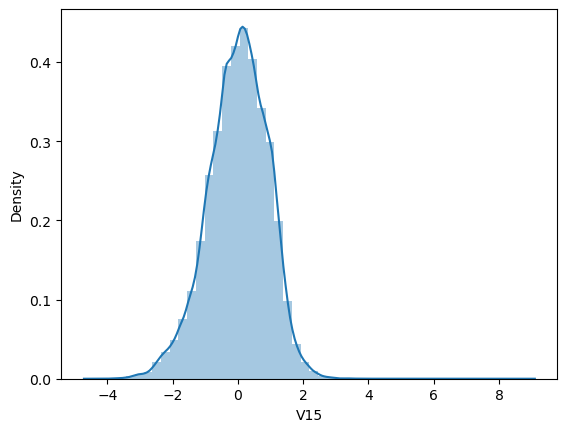

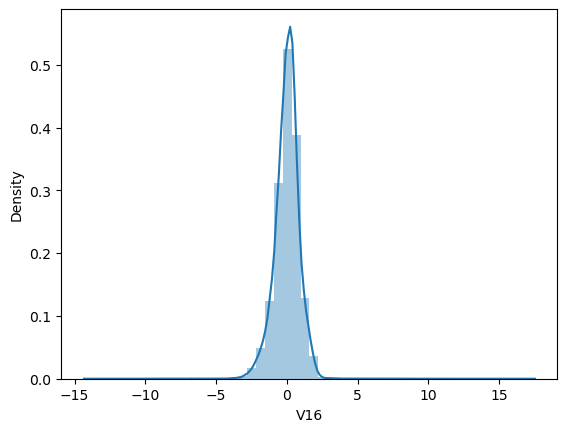

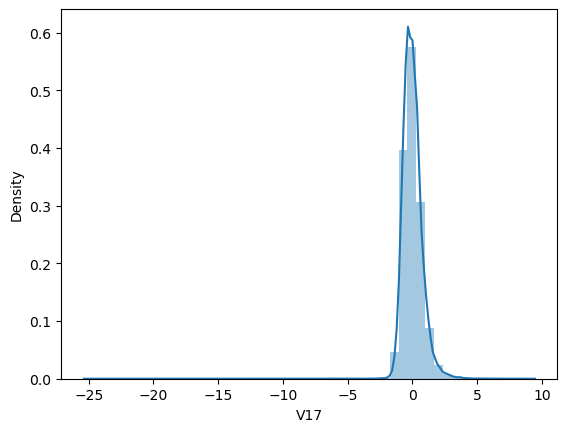

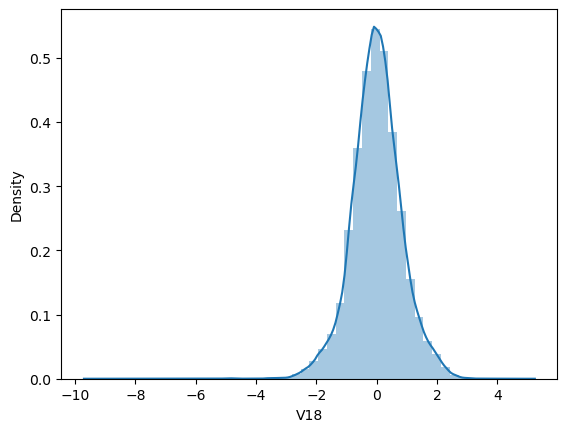

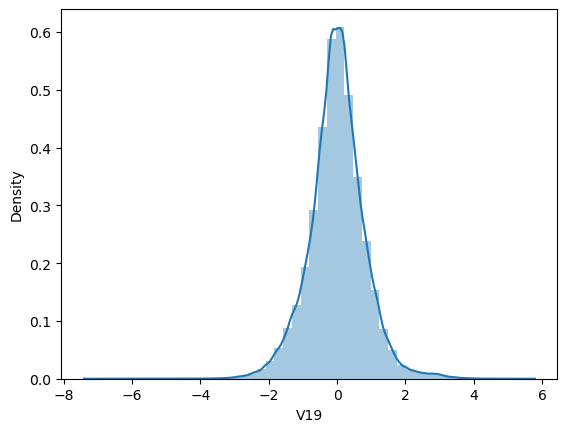

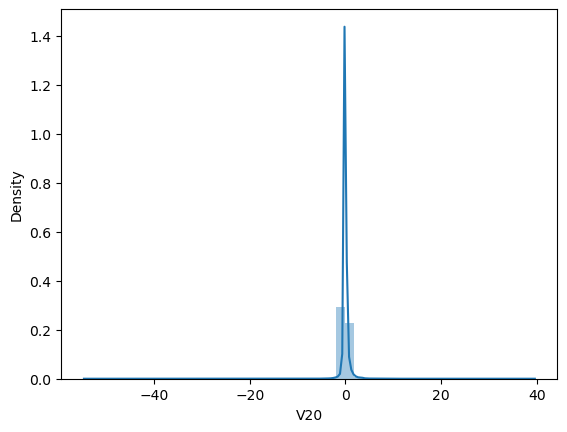

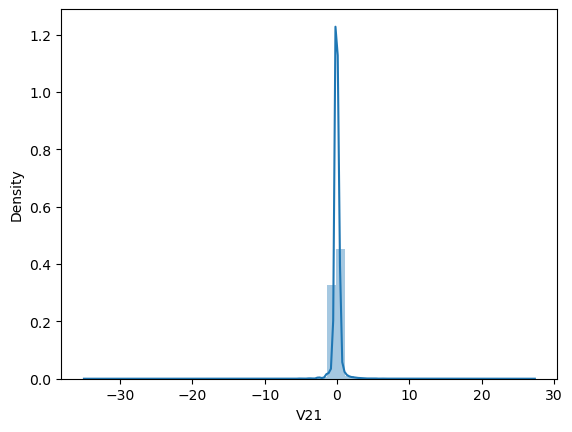

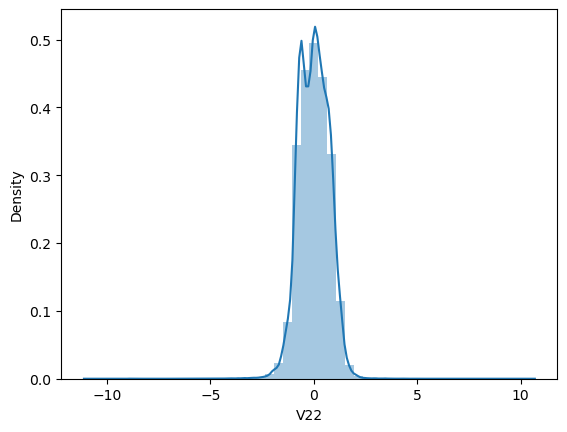

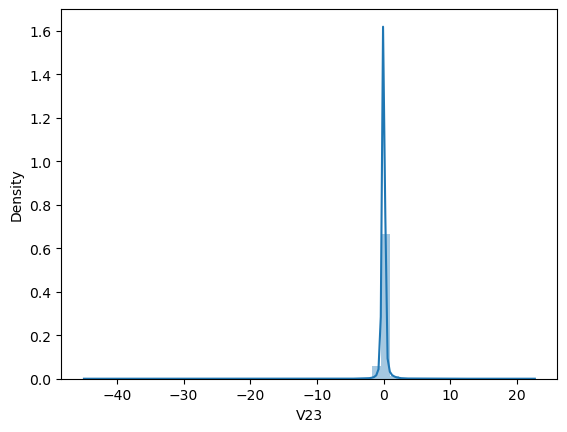

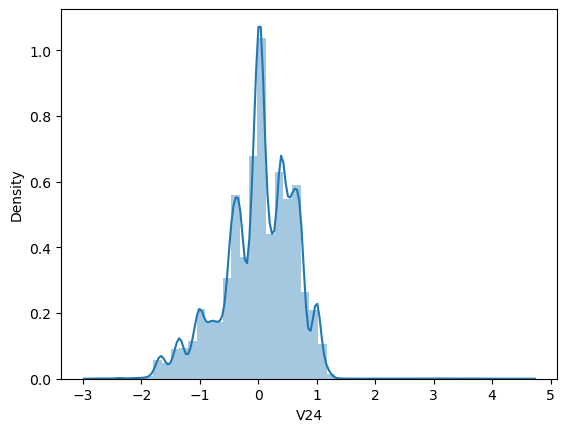

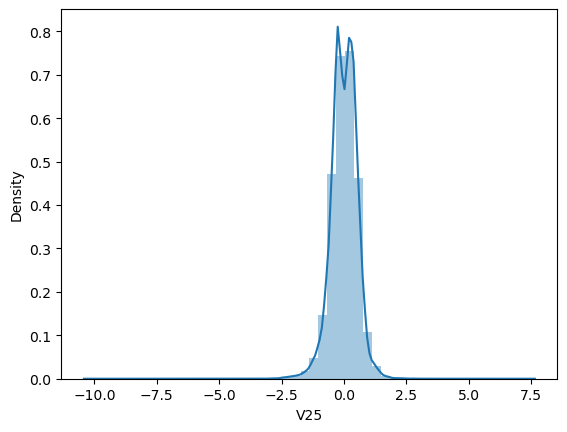

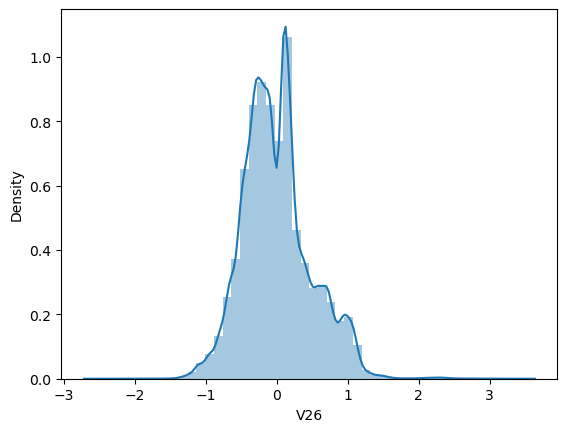

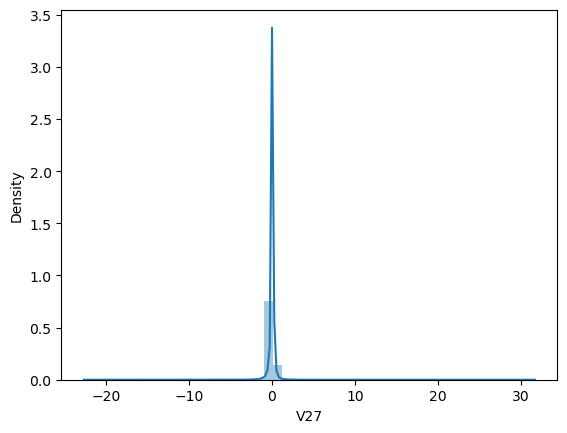

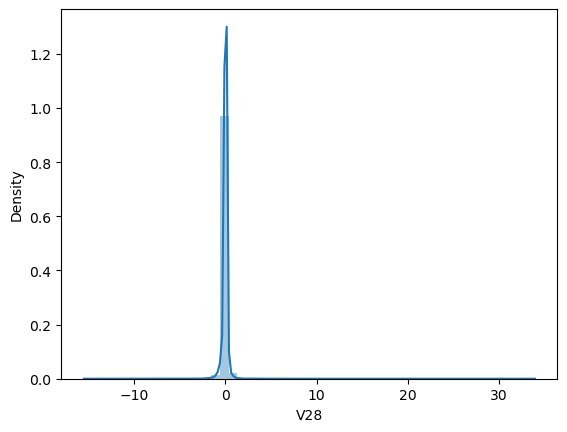

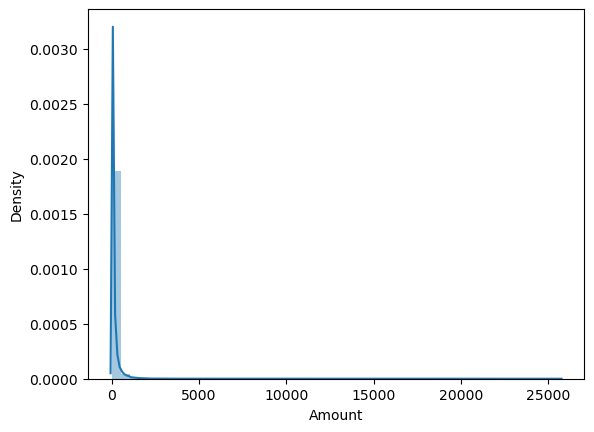

In [229]:
for i in woc.columns:
    sns.distplot(woc[i])
    plt.show()

Amount and V28 appear to be highly skewed

**12. With the help of a standard scaler, normalize the respective column
distribution.**

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
ss=StandardScaler()
cc['V13']=ss.fit_transform(cc[['V13']])

In [232]:
cc['Time']=ss.fit_transform(cc[['Time']])

In [233]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,-1.050379e-14,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**13. List down columns that have high kurtosis.**

In [234]:
from scipy import stats

In [235]:
stats.kurtosis(cc['Time'])

-1.293528408946613

In [236]:
l=[]
c=[]
for i in woc.columns:
    k=stats.kurtosis(woc[i])
    l.append(k)
    c.append(i)
k=pd.DataFrame()
k['Columns']=c
k['Kurtosis']=l
k.sort_values(by='Kurtosis',ascending=False)

,Columns,Kurtosis
28,V28,933.381095
29,Amount,845.077788
23,V23,440.080912
7,V7,405.600275
20,V20,271.011334
27,V27,244.984919
8,V8,220.583080
21,V21,207.283380
5,V5,206.900907
2,V2,95.771404


**14. What is the distribution of Time and Amount columns in the dataset ?**

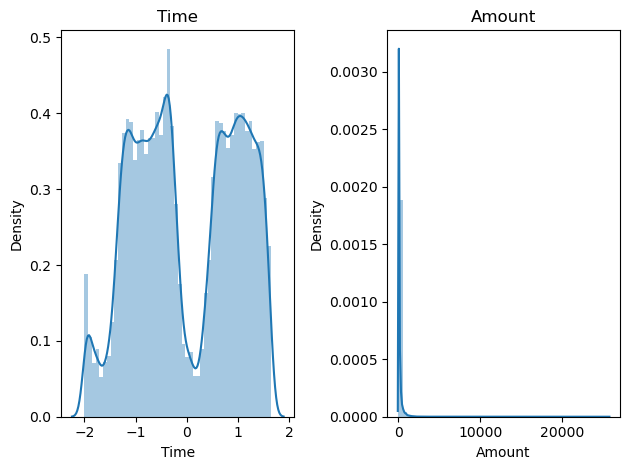

In [237]:
plt.subplot(1,2,1)
sns.distplot(cc['Time'])
plt.title(label='Time')
plt.subplot(1,2,2)
sns.distplot(cc['Amount'])
plt.title(label='Amount')
plt.tight_layout()
plt.show()

Time appears to be almost normally distributed but also consists of multimodes. Amount is highly right skewed.

**15. Find the distribution of all variables with respect to the outcome ‘Class’
variable.**

In [238]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


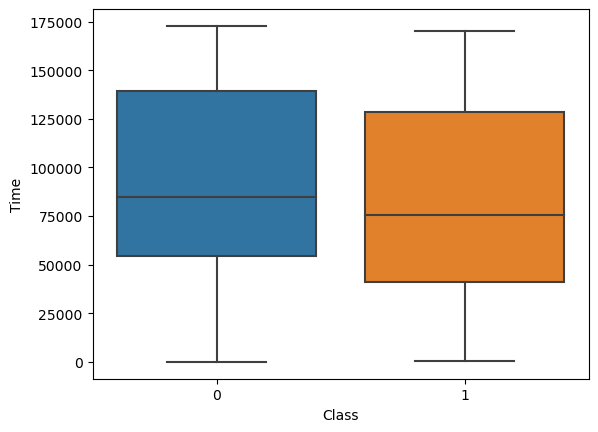

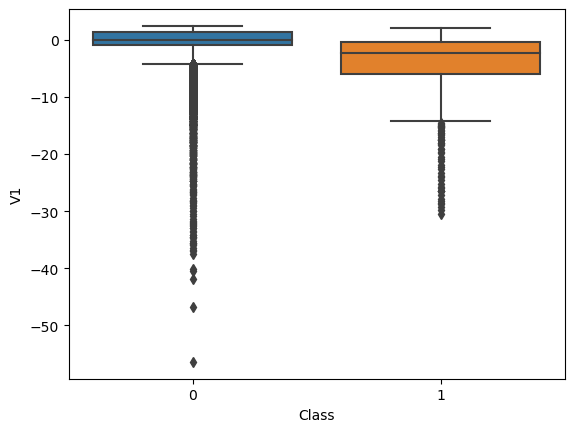

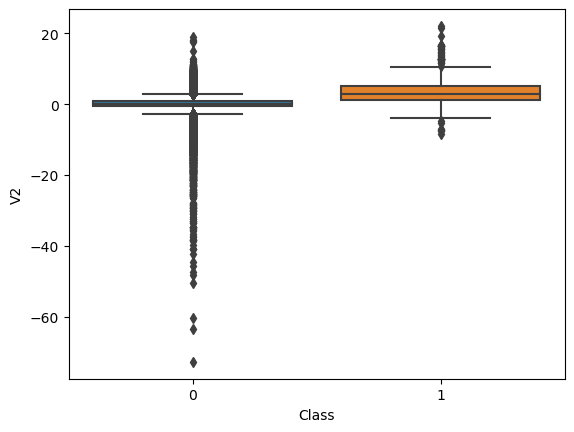

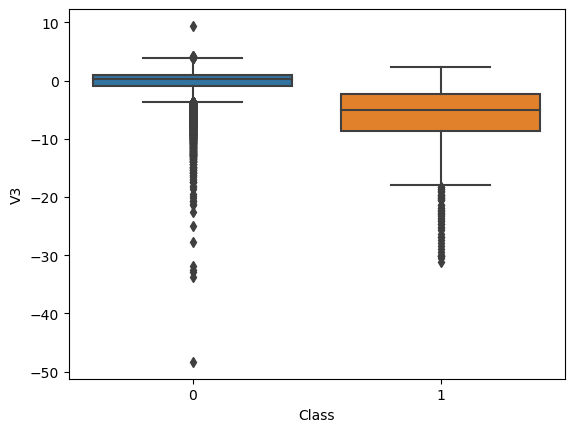

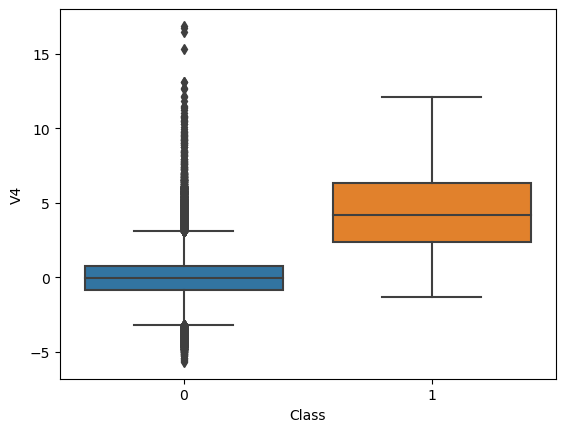

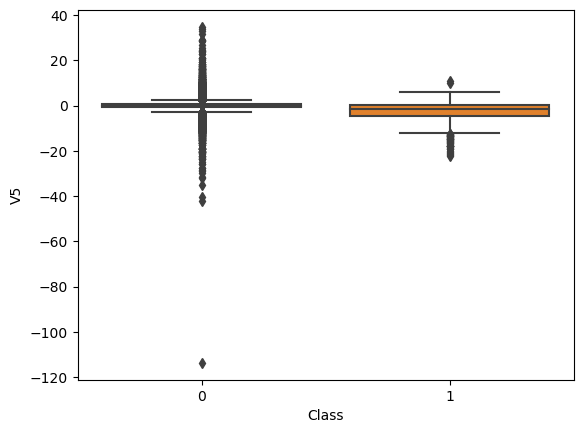

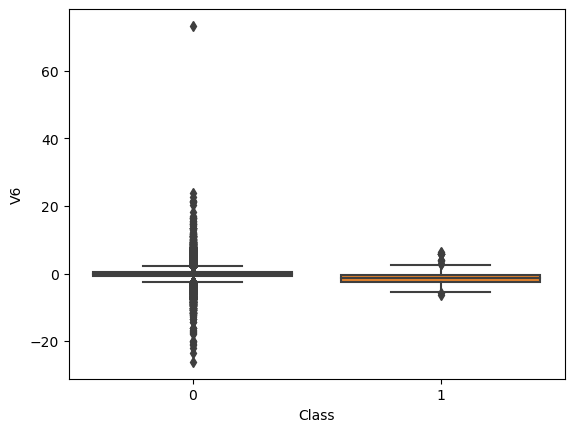

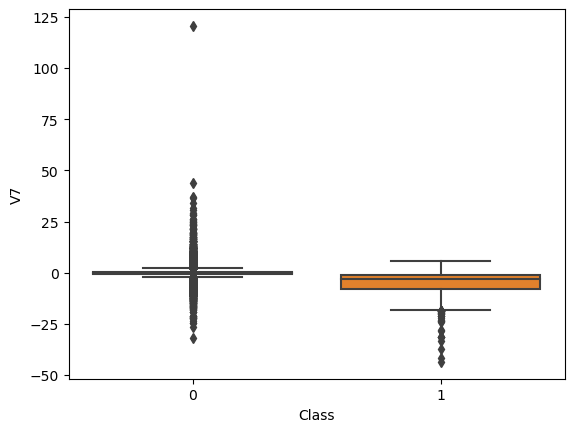

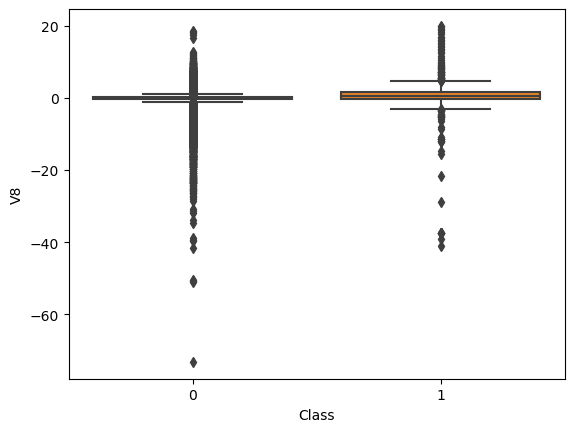

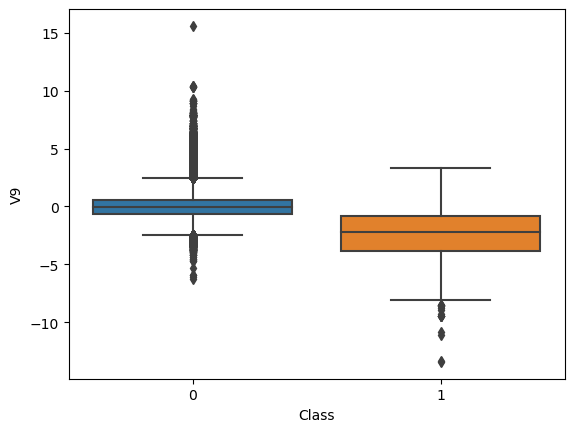

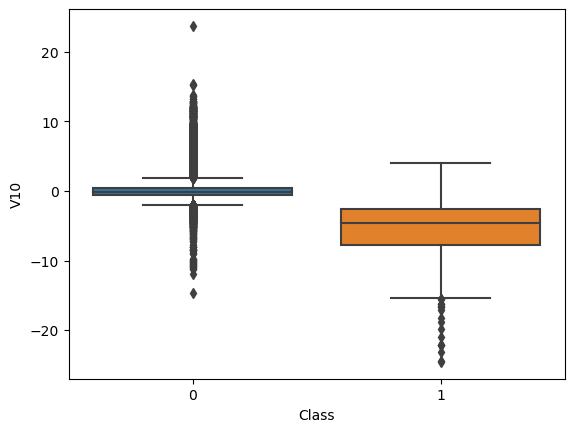

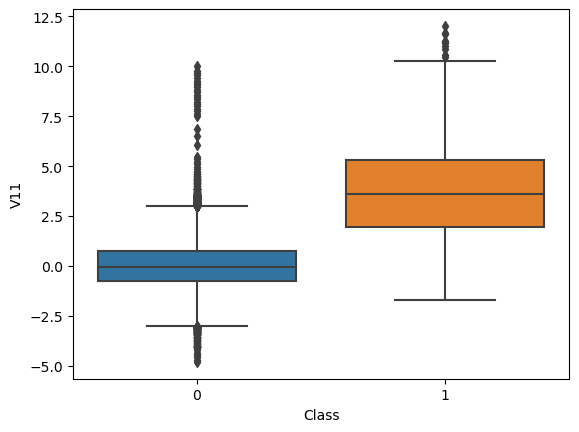

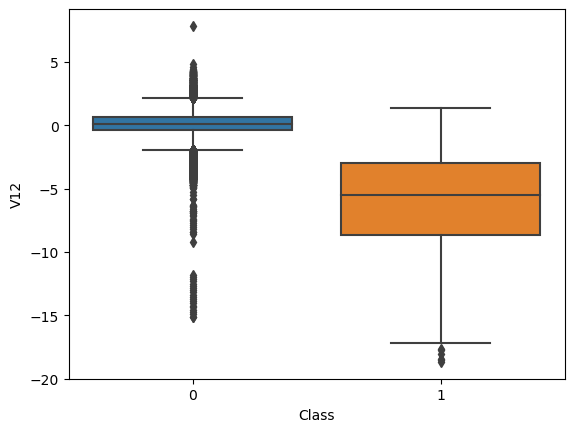

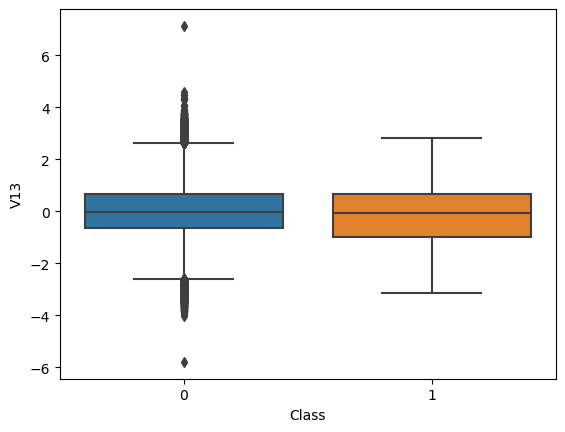

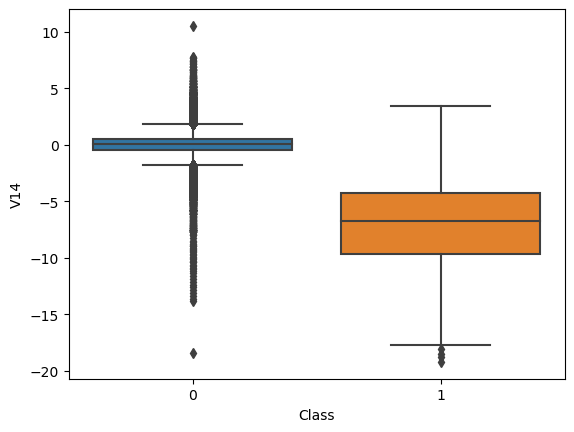

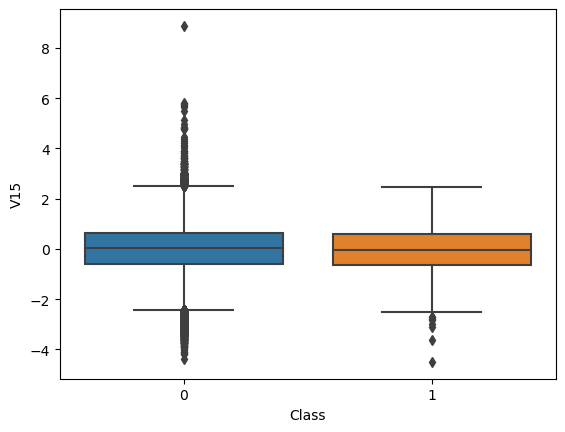

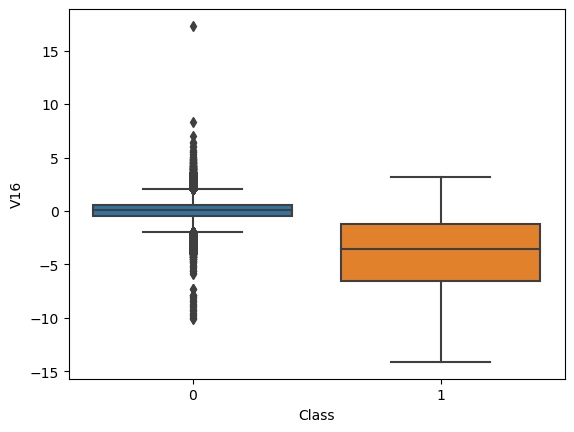

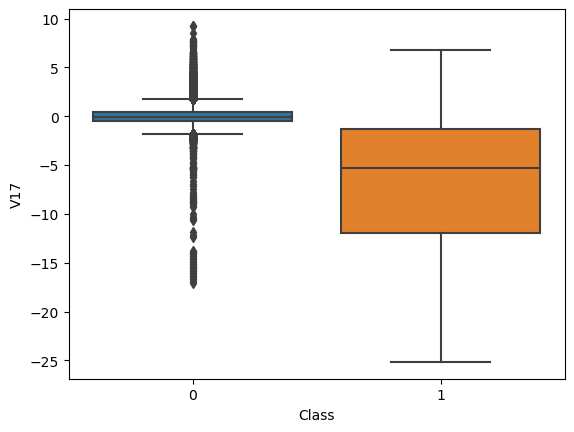

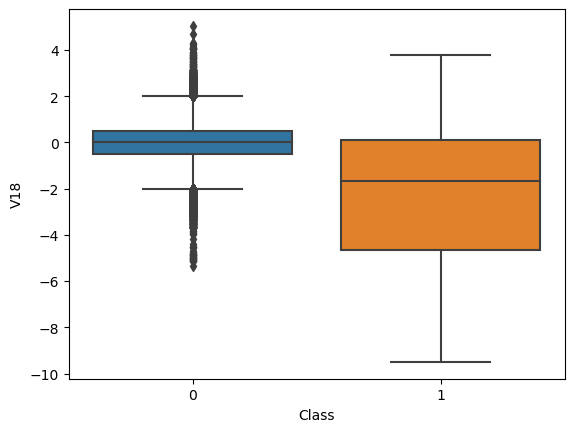

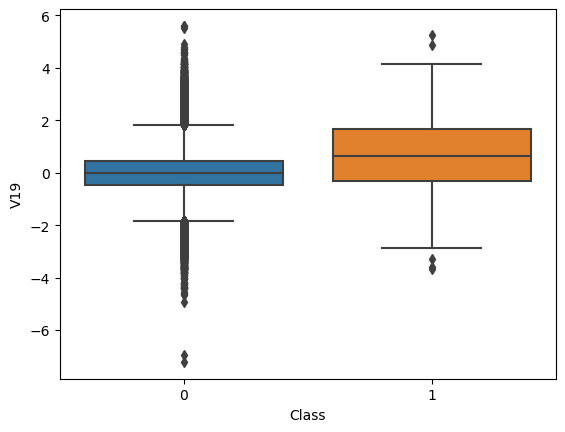

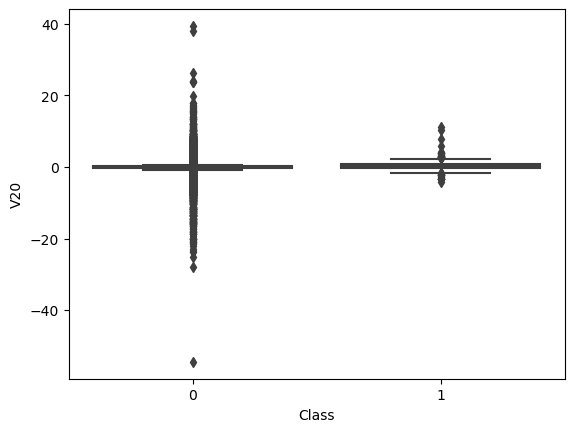

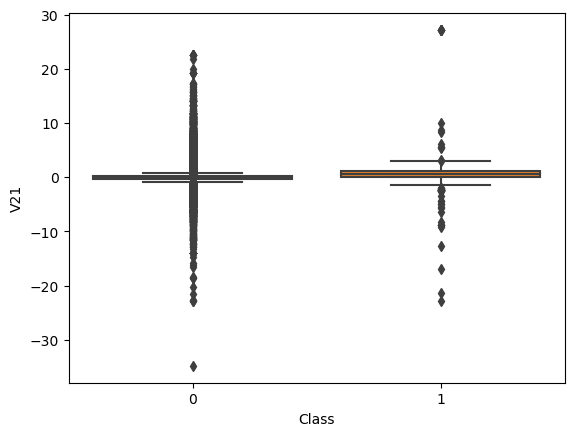

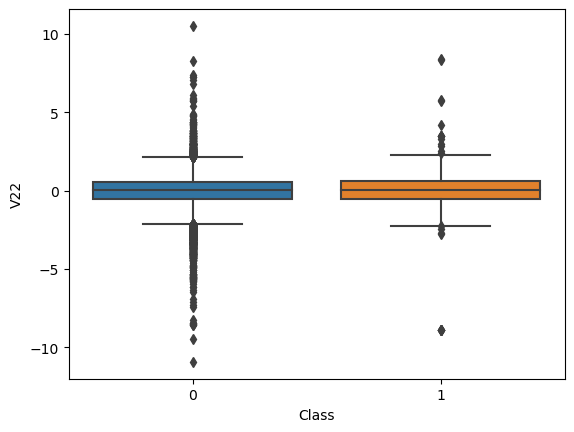

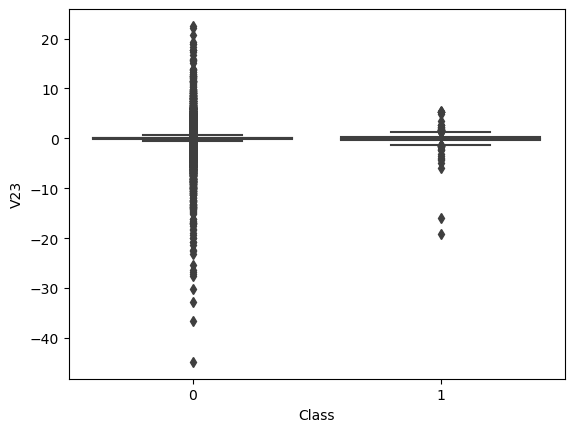

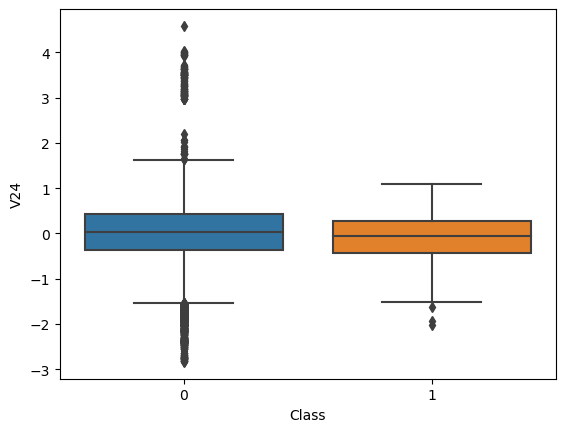

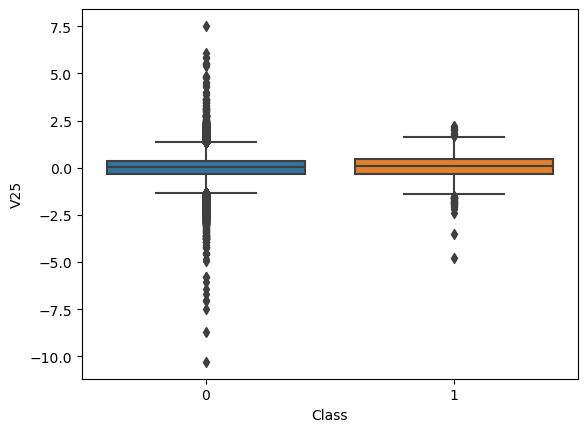

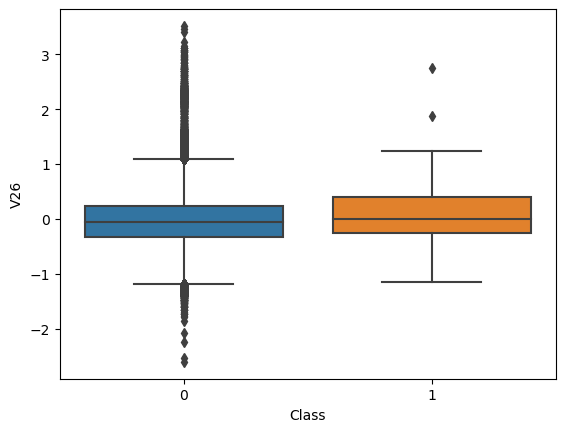

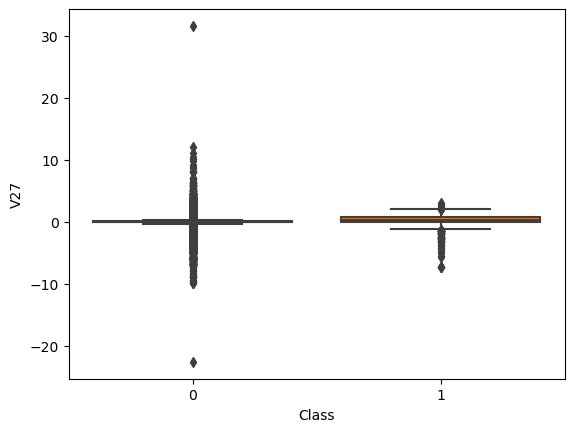

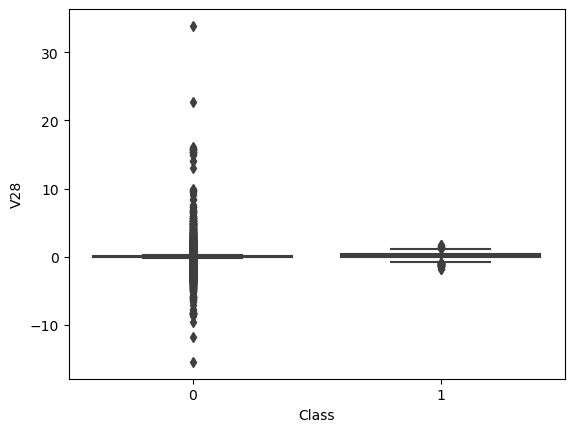

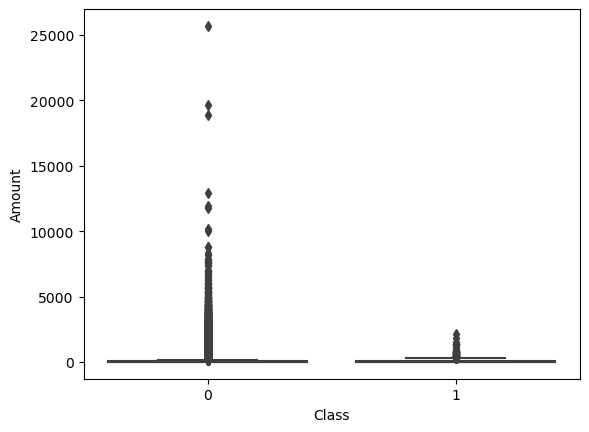

In [239]:
for i in woc.columns:
    sns.boxplot(x=cc['Class'],y=woc[i])
    plt.show()

Time does not have any outliers. Amount has positive outliers whereas columns V1-V28 have both positive and negative outliers.

**16. Create a countplot for the outcome class in seaborn using percentage
instead of count for each bar.**

In [240]:
cc['Class'].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Text(0, 0.5, 'Percentage')

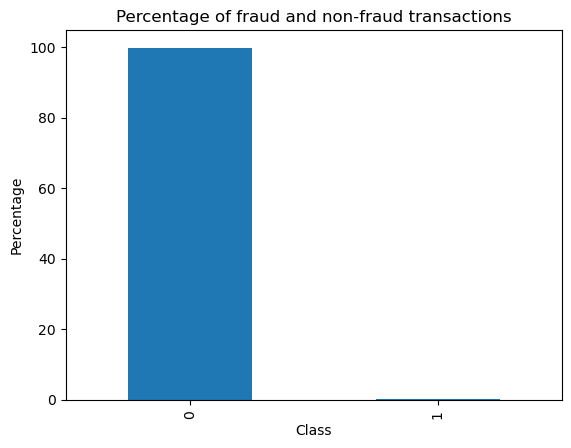

In [241]:
(cc['Class'].value_counts(normalize=True)*100).plot(kind='bar')
plt.title(label='Percentage of fraud and non-fraud transactions')
plt.xlabel('Class')
plt.ylabel('Percentage')

Percentage of class 0 is higher than class 1

**17. Plot a heatmap for correlation matrix for the given dataset. Write the
Observation. Especially note down columns that are highly correlated
(Positive and Negative Correlation, Consider 0.7 to 1 as high).**

<AxesSubplot:>

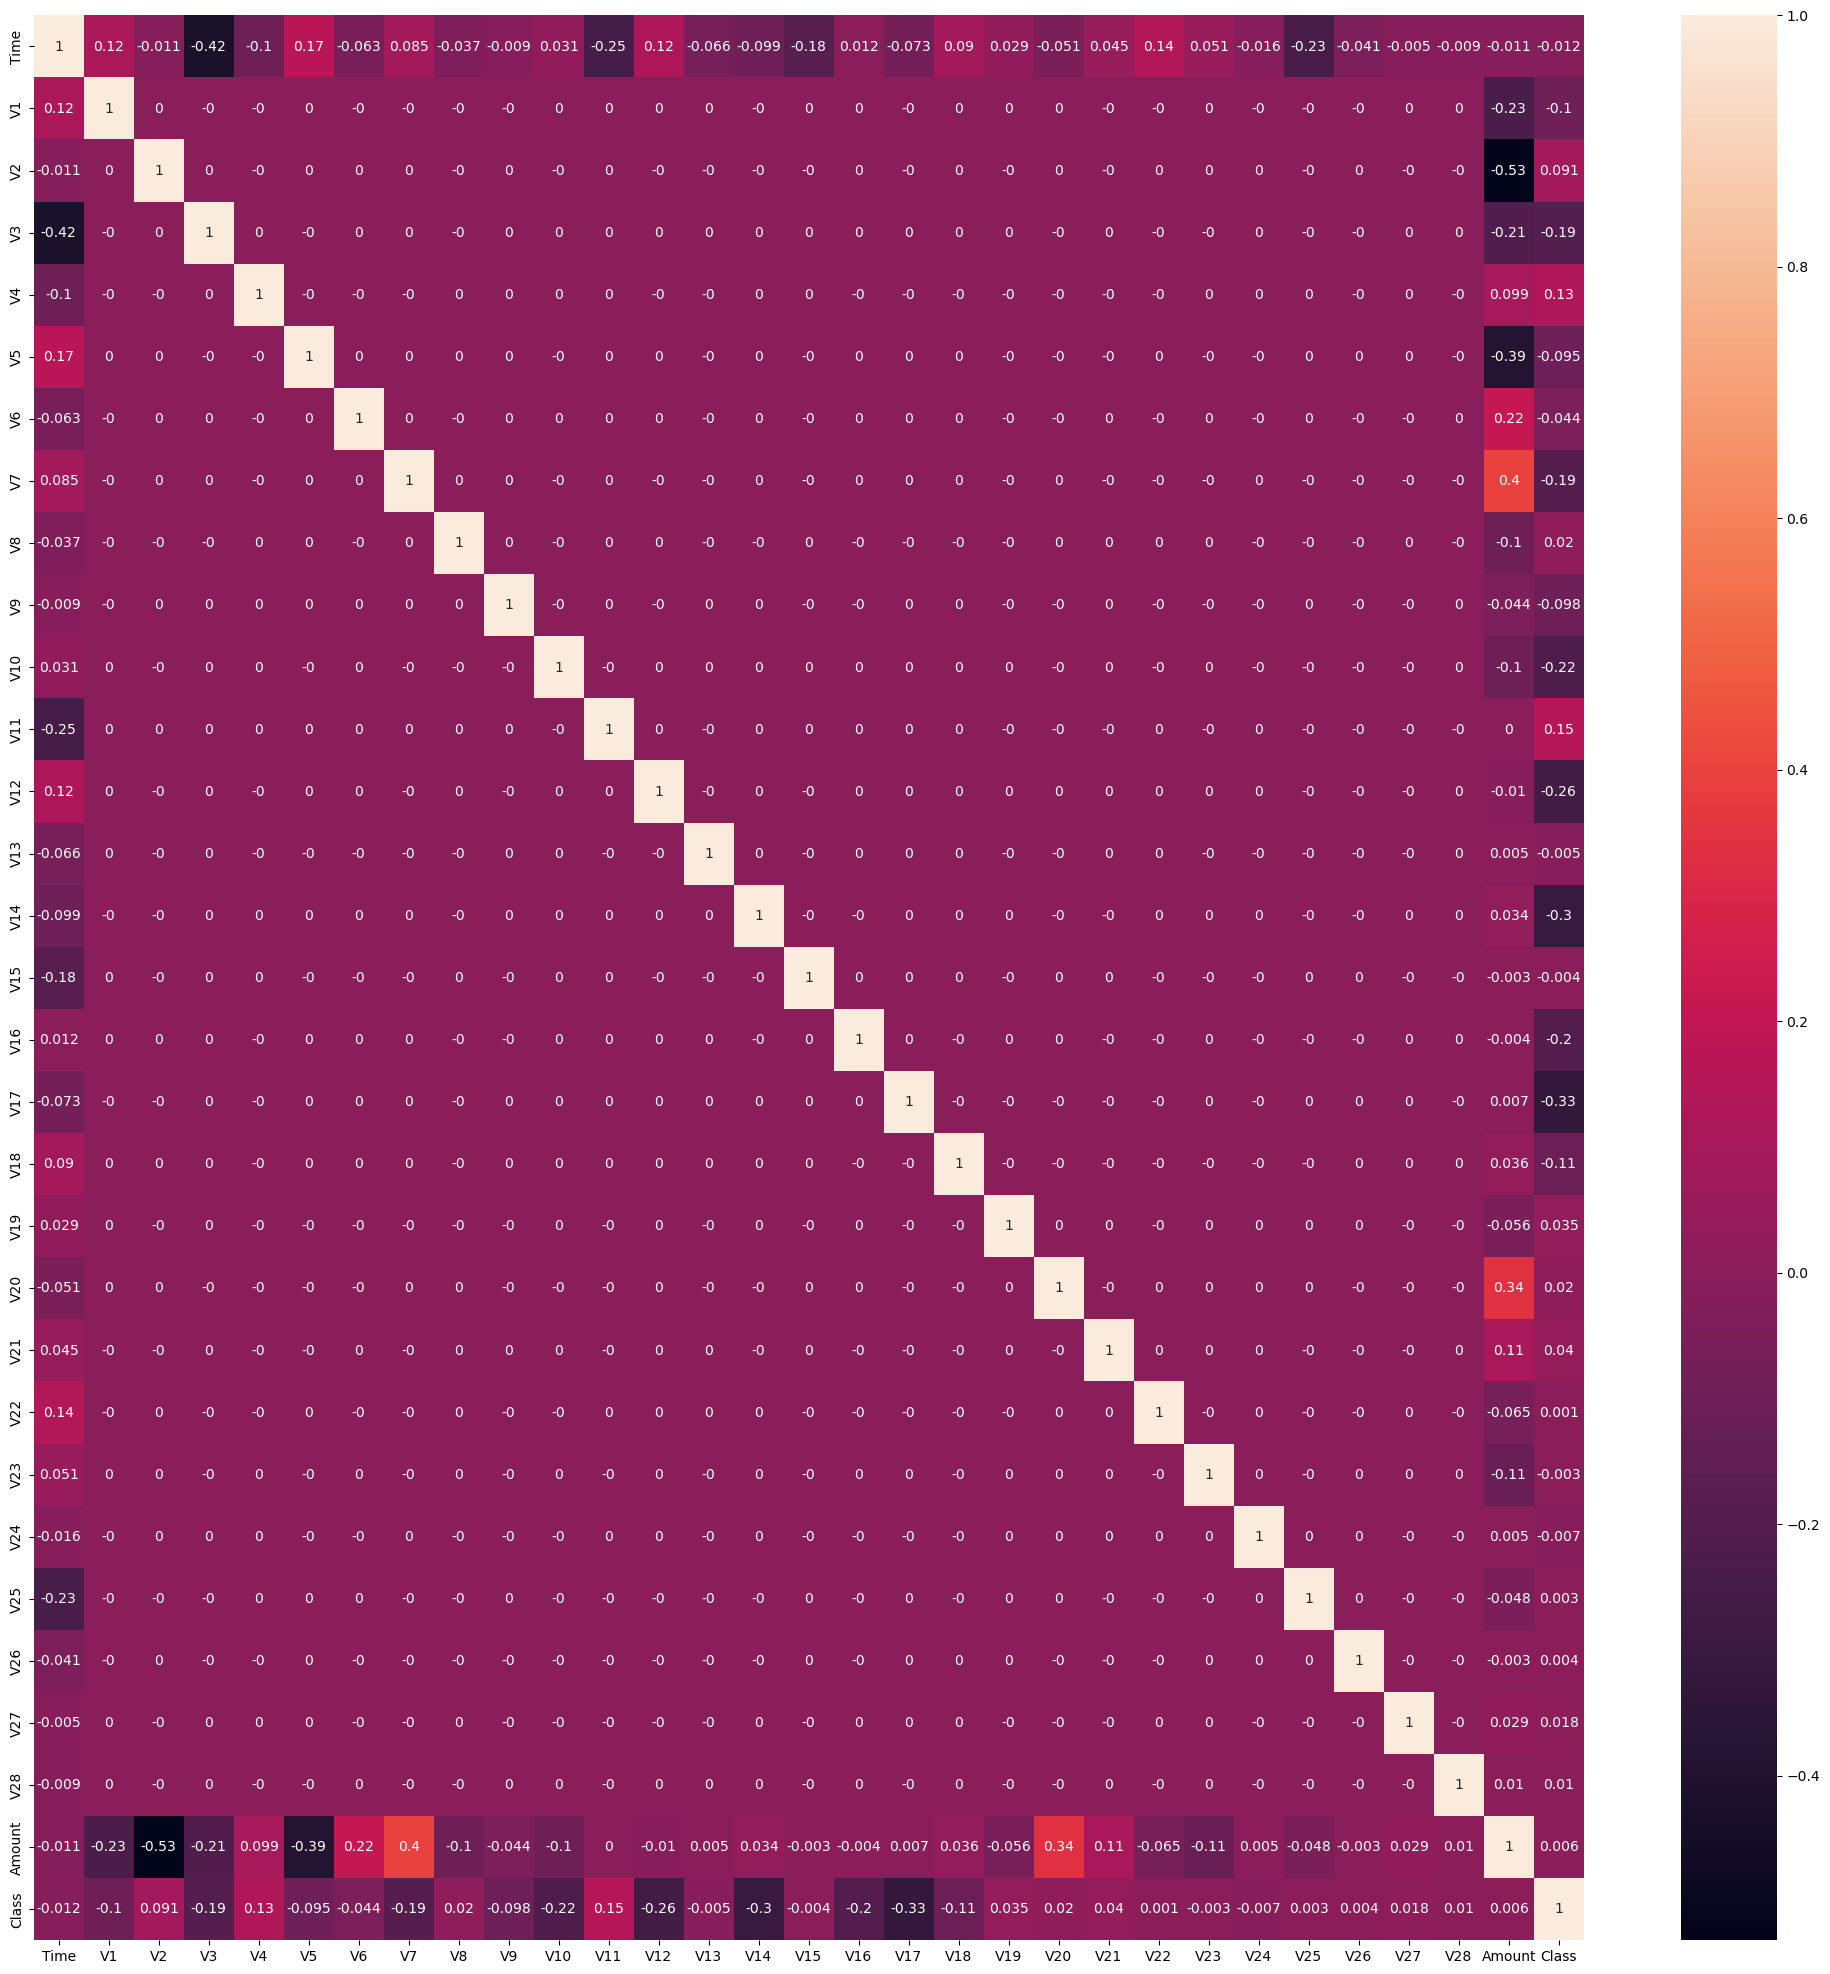

In [242]:
plt.figure(figsize=(25,25))
sns.heatmap(round(cc.corr(),3),annot=True)

In [243]:
cc.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


There is no high correlations observed between 2 variables. The highest correlation value is -0.53, a negative correlation that is only observed between the columns V2 and Amount. The next highest correlation is 0.4, a positive correlation observed between V7 and amount. Other correlations between other columns are weak. 

**18. With the help of hypothesis testing check whether fraudulent transactions 
of higher value than normal transactions?**

In [244]:
cc.shape

(284807, 31)

In [245]:
# class: 1 is fraud
samp1=cc[cc['Class']==1]['Amount'] # Fraudulent transactions
samp2=cc[cc['Class']==0]['Amount'] # Non-fraudulent transactions
stats.shapiro(samp1),stats.shapiro(samp2),stats.levene(samp1,samp2) 
# pvalue < 0.05 for both shapiro and levene, hence rejecting H0
# Based on the Shapiro result, it appears that both the data are not normal. 
# Levene's test also shows that the data don't have equal variances.

(ShapiroResult(statistic=0.5253349542617798, pvalue=2.8247289962377845e-34),
 ShapiroResult(statistic=0.30967265367507935, pvalue=0.0),
 LeveneResult(statistic=12.684214894874506, pvalue=0.0003688154902664781))

Framing Hypothesis:

H0: Fraudulent transactions are lesser and equal to non-fraudulent transactions.

H1: Fraudulent transactions are greater than non-fraudulent transactions.

In [246]:
# Performing Non-parametric test, right tail
stats.mannwhitneyu(samp1,samp2, alternative='greater')
# pvalue > 0.05. Failing to reject H0. Fraudulent transactions are lesser and equal to non-fraudulent transactions.

MannwhitneyuResult(statistic=61833399.0, pvalue=0.9999957107748069)

**19. Perform ANOVA test for Statistical feature selection.**

In [247]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sma

In [248]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [249]:
param=pd.DataFrame()
param['Cols']=list(woc.columns)
param['Shapiro_0']=[stats.shapiro(cc[cc['Class']==0][i]) for i in woc.columns]
param['Shapiro_1']=[stats.shapiro(cc[cc['Class']==1][i]) for i in woc.columns]
param['Levene']=[stats.levene(cc[cc['Class']==0][i],cc[cc['Class']==1][i]) for i in woc.columns]
param.head(30) # The variables are neither normally distributed nor have equal variance because of the less presence of class 1.

,Cols,Shapiro_0,Shapiro_1,Levene
0,Time,"(0.9402686357498169, 0.0)","(0.9426328539848328, 7.456713740396081e-13)","(2.012582536484787, 0.1560006626804377)"
1,V1,"(0.8087005615234375, 0.0)","(0.7861577272415161, 6.846555843887436e-25)","(2524.1386211194854, 0.0)"
2,V2,"(0.7408018112182617, 0.0)","(0.8936406970024109, 5.730751537930147e-18)","(1046.30951453062, 4.032691122240109e-229)"
3,V3,"(0.9436910152435303, 0.0)","(0.8355799317359924, 3.8232781171147756e-22)","(6975.829896672184, 0.0)"
4,V4,"(0.9741516709327698, 0.0)","(0.975259006023407, 2.1507786129859596e-07)","(930.7994732187565, 4.234328444737248e-204)"
5,V5,"(0.8355342149734497, 0.0)","(0.8628983497619629, 2.406712688378578e-20)","(3496.8098967681144, 0.0)"
6,V6,"(0.8437014818191528, 0.0)","(0.946989893913269, 2.878195511785142e-12)","(106.52366799974065, 5.718953259433754e-25)"
7,V7,"(0.7620210647583008, 0.0)","(0.8223278522491455, 6.166739004101421e-23)","(9023.62066537395, 0.0)"
8,V8,"(0.5125795602798462, 0.0)","(0.6330137252807617, 4.485829382850909e-31)","(2918.4473908397295, 0.0)"
9,V9,"(0.9712955355644226, 0.0)","(0.9503900408744812, 8.700794425220426e-12)","(1099.8870421058173, 1.0098822729140276e-240)"


In [250]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [251]:
woc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

Framing Hypothesis:

H0: Features are insignificant

H1: Features are significant

In [252]:
# As the data is not following assumptions of ANOVA, Kruskall-Wallis H test have to performed
for i in woc.columns:
    print(i,':',stats.kruskal(cc[cc['Class']==0][i],cc[cc['Class']==1][i]))

Time : KruskalResult(statistic=38.93294677059038, pvalue=4.386151468369562e-10)
V1 : KruskalResult(statistic=512.580647740246, pvalue=1.7407738710561974e-113)
V2 : KruskalResult(statistic=742.5762816177391, pvalue=1.650425340223813e-163)
V3 : KruskalResult(statistic=1000.7871975190474, pvalue=1.2110375124862816e-219)
V4 : KruskalResult(statistic=1132.0209117885001, pvalue=3.625870930731769e-248)
V5 : KruskalResult(statistic=258.85167277095024, pvalue=3.0536984281480964e-58)
V6 : KruskalResult(statistic=420.1789412683843, pvalue=2.2309898912335437e-93)
V7 : KruskalResult(statistic=664.63837359741, pvalue=1.4642232823798744e-146)
V8 : KruskalResult(statistic=146.8390191518028, pvalue=8.509863005980012e-34)
V9 : KruskalResult(statistic=697.8119309459647, pvalue=8.943658462420498e-154)
V10 : KruskalResult(statistic=1010.450246507377, pvalue=9.611047015173992e-222)
V11 : KruskalResult(statistic=1030.194668266238, pvalue=4.910548538089946e-226)
V12 : KruskalResult(statistic=1125.737229929833

In [253]:
c=[]
p=[]
for i in woc.columns:
    Teststat,pvalue=stats.kruskal(cc[cc['Class']==0][i],cc[cc['Class']==1][i])
    c.append(i)
    p.append(round(pvalue,5))
    
s=pd.DataFrame(zip(c,p),columns=['Columns','Pvalue'])
s

,Columns,Pvalue
0,Time,0.00000
1,V1,0.00000
2,V2,0.00000
3,V3,0.00000
4,V4,0.00000
5,V5,0.00000
6,V6,0.00000
7,V7,0.00000
8,V8,0.00000
9,V9,0.00000


In [254]:
s[s['Pvalue']<0.05] # features that are significant

,Columns,Pvalue
0,Time,0.00000
1,V1,0.00000
2,V2,0.00000
3,V3,0.00000
4,V4,0.00000
5,V5,0.00000
6,V6,0.00000
7,V7,0.00000
8,V8,0.00000
9,V9,0.00000


**20. Split the dataset randomly into train and test datasets. Use a train -testratio 
of 70:30 ratio.**

In [255]:
from sklearn.model_selection import train_test_split
X=cc.drop('Amount',axis=1)
y=cc['Amount']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

**21. These are just checkpoints. Please use your best analytical approach to build this
report. You can mix match columns to create new ones which can be used for better analysis. Create your own features if required. Be highly
experimental and analytical here to find hidden patterns. You can use the
following as checklist pointers :**

* The shape of the credit card dataset is (284807, 31) (no. of rows, no. of columns). 
* The size of the dataset is 8829017. 
* The highly skewed columns are Amount, V28, V8, V23, V21, V7, V20, V3, V12, V5, V1, V17, and V2.
* The columns with high kurtosis are V28, Amount, V23, V7, V20, V27, V8, V21, V5, V2, V17, V6, V1, V10, V3, V14, V12, V16, V25, and V9.
* No columns with wrong data type were observed.
* All the columns except Time have outliers.
* No missing values were found.
* Amount has high amount of zero. Transaction amount could be zero too.
* Time and Amount have high variances and standard deviations.
* Time and V13 were having almost normal distribution whereas Amount was highly positive skewed and V8 was highly negative skewed.
* There is no much information about features from V1-V28. It will be hard to explain about their minimum and maximum extreme values.
* There are no boolean columns within the dataset.
* Duplicated records are found. 1081 rows were duplicated.
* The only categorical column in the dataset is Class, which had only 0 (99%) and 1 (0.17%) and is imbalanced.
* The Class plays a crucial role detecting fraudulent transactions.
* Even for non-fraudulent transactions, amount was 0 in some cases. 
* As we don't have much information about V1-V28 features we are considering all the columns are unique in the data. Class is the only category in the data and it also in binary. 
* Steps for Data preprocessing:
       a) Check the size and shape of the data.
       b) Check the data type and make appropriate changes.
       c) Make univariate and bivariate analysis.
       d) Check the missing values in the data and impute with mean, median, and mode accordingly or drop if needed.
       e) Check for distribution and skewness.
       f) Check for outliers and treat them based on requirement.
       g) Encode the categorical variables.
       h) After model building process, data can be transformed and scaled accordingly to achieve good fit model.
* Steps for Feature Selection and Feature Creation:
       a) Features can be selected based on their significance results from ANOVA or Kruskall-Wallis H test.
       b) In this dataset, a feature is created for the feature amount by categorising amount into Transaction and No transaction. This column will further encoded by one hot label encoding, which will be tested for its significance in the data.

In [256]:
#IQR
def iqr(x,c):
    q1=x[c].quantile(0.25)
    q3=x[c].quantile(0.75)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    return x[(x[c]<ll)|(x[c]>ul)]

In [257]:
for i in woc.columns:
    print("No. of outlier entries in",i,':',len(iqr(cc,i)))

No. of outlier entries in Time : 0
No. of outlier entries in V1 : 7062
No. of outlier entries in V2 : 13526
No. of outlier entries in V3 : 3363
No. of outlier entries in V4 : 11148
No. of outlier entries in V5 : 12295
No. of outlier entries in V6 : 22965
No. of outlier entries in V7 : 8948
No. of outlier entries in V8 : 24134
No. of outlier entries in V9 : 8283
No. of outlier entries in V10 : 9496
No. of outlier entries in V11 : 780
No. of outlier entries in V12 : 15348
No. of outlier entries in V13 : 3368
No. of outlier entries in V14 : 14149
No. of outlier entries in V15 : 2894
No. of outlier entries in V16 : 8184
No. of outlier entries in V17 : 7420
No. of outlier entries in V18 : 7533
No. of outlier entries in V19 : 10205
No. of outlier entries in V20 : 27770
No. of outlier entries in V21 : 14497
No. of outlier entries in V22 : 1317
No. of outlier entries in V23 : 18541
No. of outlier entries in V24 : 4774
No. of outlier entries in V25 : 5367
No. of outlier entries in V26 : 5596
No

In [258]:
cc[cc.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-1.996036,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,-1.996036,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,-1.995025,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,-1.995025,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,-1.995025,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,1.610387,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,1.617525,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,1.617525,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,1.630286,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


## Major Challenges

**1. Create an appropriate feature for the credit card fraud dataset**

In [259]:
df2=cc
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [260]:
df2['Transaction']=df2['Amount'].apply(lambda x:'N' if x==0 else 'Y')
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Y
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Y
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Y
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Y
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Y


In [261]:
df2[df2['Amount']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction
383,-1.990645,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0,N
514,-1.988581,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0,N
534,-1.988097,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0,N
541,-1.988034,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1,N
575,-1.987528,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,1.621526,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0,N
283782,1.622642,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0,N
283949,1.625948,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0,N
284085,1.628328,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0,N


In [262]:
df3=pd.get_dummies(df2,drop_first=True)
df3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction_Y
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1


In [263]:
x=df3.drop('Amount',axis=1)
y=df3['Amount']
model_s=sma.OLS(y,sma.add_constant(x)).fit()
model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.022e+05
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:25:36   Log-Likelihood:            -1.6215e+06
No. Observations:              284807   AIC:                         3.243e+06
Df Residuals:                  284775   BIC:                         3.243e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            86.4871      1.701     50.839      0.000      83.153      89.821
Time             -0.8661      0.185     -4.692      0.000      -1.228      -0.504
V1              -28.9295      0.070   -411.310      0.000     -29.067     -28.792
V2              -80.5983      0.082   -979.925      0.000     -80.760     -80.437
V3              -34.7873      0.105   -329.786      0.000     -34.994     -34.581
V4               17.2126      0.098    175.145      0.000      17.020      17.405
V5              -69.7746      0.101   -689.822      0.000     -69.973     -69.576
V6               40.5695      0.102    399.150      0.000      40.370      40.769
V7               80.6675      0.113    711.024      0.000      80.445      80.890
V8              -21.6445      0.113   -191.696      0.000     -21.866     -21.423
V9               -9.9168      0.124    -80.116      0.000     -10.159      -9.674
V10             -22.9181      0.130   -176.656      0.000     -23.172     -22.664
V11              -0.4707      0.142     -3.305      0.001      -0.750      -0.192
V12              -1.7976      0.146    -12.333      0.000      -2.083      -1.512
V13               1.2741      0.135      9.425      0.000       1.009       1.539
V14               9.3034      0.155     60.214      0.000       9.001       9.606
V15              -0.9887      0.152     -6.511      0.000      -1.286      -0.691
V16              -0.6848      0.160     -4.286      0.000      -0.998      -0.372
V17               2.7881      0.176     15.836      0.000       2.443       3.133
V18              10.9757      0.164     66.962      0.000      10.654      11.297
V19             -17.3065      0.166   -104.382      0.000     -17.631     -16.982
V20             110.0080      0.175    628.071      0.000     109.665     110.351
V21              36.0454      0.184    195.957      0.000      35.685      36.406
V22             -22.1588      0.189   -117.134      0.000     -22.530     -21.788
V23             -45.0354      0.216   -208.379      0.000     -45.459     -44.612
V24               2.1233      0.222      9.549      0.000       1.688       2.559
V25             -23.3489      0.271    -86.112      0.000     -23.880     -22.817
V26              -1.7450      0.280     -6.236      0.000      -2.293      -1.197
V27              17.7676      0.334     53.249      0.000      17.114      18.422
V28               7.6916      0.408     18.855      0.000       6.892       8.491
Class            44.7525      4.687      9.548      0.000      35.566      53.939
Transaction_Y     1.7967      1.707      1.053      0.292      -1.548       5.142
==============================================================================
Omnibus:                   475767.766   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB

Adding feature 'Transaction_Y' to the data, have showed the varible is insignificant. According to t

**2. Consider the distribution of age is normal ,find the probability that a person become CEO age between 45 and 54**

In [264]:
mu=df['Age'].mean()
s=df['Age'].std()
n=len(df['Age'])
x1bar=54
x2bar=45
z1=(x1bar-mu)/(s/np.sqrt(n))
z2=(x2bar-mu)/(s/np.sqrt(n))
stats.norm.cdf(z1)-stats.norm.cdf(z2)

0.17528180522510645

**3. Find the minimum standard deviation required to get a 90% confidence interval for the age distribution and marginal error is 6%**

In [265]:
marginal_err=0.06
n=len(df['Age'])
z_alpha=stats.t.isf(0.05,df=n-1)
sigma=(marginal_err*np.sqrt(n))/(z_alpha)
sigma

0.2310591984739469

**4. Visualize the fraud and non fraud transactions with respect to transaction occurrence**

In [266]:
pd.crosstab(df2['Class'],df2['Transaction'])

Transaction,N,Y
Class,,
0,1798,282517
1,27,465


<AxesSubplot:xlabel='Class'>

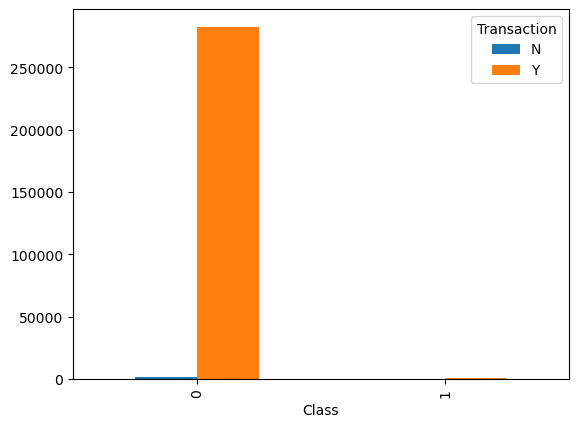

In [267]:
pd.crosstab(df2['Class'],df2['Transaction']).plot(kind='bar')

Non-fraudulent data has higher number of transactions and non-transactions than fraudulent.

**5. What is the probability of fraudulent transactions given that amount is zero?**

In [268]:
total_zero=cc[cc['Amount']==0].shape[0]
fraud_zero=fraud[fraud['Amount']==0].shape[0]
p=fraud_zero/total_zero
p

0.014794520547945205